In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings

In [213]:
# Import the Walmart csv file
file = 'C:\\Rohan\\SharpestMinds - Projects\\Project 7\\Walmart.csv'
walmart = pd.read_csv(file)

## Data Understanding

Data understanding is the process of gaining knowledge and insights about the data that will be used for analysis. It involves exploring the data, examining its structure, content, and relationships between variables. Data understanding helps in forming a clear picture of the data and its characteristics, which is essential for effective analysis.

For analyzing the Walmart sales data specifically, data understanding is crucial because:

Contextual Understanding: It provides insights into the specific context of Walmart sales, such as the store, date, and factors like holidays, temperature, fuel prices, CPI, and unemployment. Understanding these contextual factors is essential for interpreting the sales data accurately.

Data Quality Assurance: Checking the data quality ensures that the sales data is reliable and accurate. For example, identifying missing or incorrect values can prevent misleading analysis results.

Relationship Exploration: Understanding the relationships between sales and other variables like holidays, temperature, fuel prices, CPI, and unemployment can help identify factors that influence sales performance. This understanding can lead to actionable insights and strategies for optimizing sales.

Analysis Planning: By understanding the data, you can plan the analysis approach appropriately. For example, you can determine whether you need to perform time series analysis, correlation analysis, or regression analysis to explore the relationships and patterns within the data.

In [3]:
# Obtain the first 10 rows of this dataset
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
# Obtain the last 10 rows of this dataset
walmart.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
# Obtain all the columns of this dataset
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

These are the columns:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [6]:
# Obtain the dimensions of this dataset
walmart.shape

(6435, 8)

We can observe that this dataset has about 6435 rows and 8 attributes

In [7]:
# Obtain the data types of this dataset
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

The attribute "Date" is of the type "Object". So, we can convert this to a datetime format.

In [214]:
from datetime import datetime
walmart['Date'] = pd.to_datetime(walmart['Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_5576\2631783926.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart['Date'] = pd.to_datetime(walmart['Date'])


In [9]:
# Obtain the info for each of the attributes 
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Out of all the attributes, almost all the attributes are of the numeric data type [either float or int] and date is the only one that is of the type "datetime". Looks like the data is well-structured with no missing values.

## Data Cleaning
Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves handling missing values, outliers, duplicate entries, and other data quality issues to ensure that the data is accurate, complete, and reliable for analysis.

Data cleaning is crucial due to the following reasons:

Data Accuracy: Ensuring the accuracy of sales data is vital for reliable analysis. Data cleaning will help identify and correct any errors or inconsistencies in the sales figures, ensuring that the reported sales values are accurate.

Missing Values: The dataset may contain missing values in certain columns. For example, there could be missing values for temperature, fuel prices, CPI, or unemployment. Data cleaning will involve handling these missing values appropriately, either by imputing reasonable values or removing incomplete rows, so that the dataset remains complete and usable.

Outliers: Outliers, which are extreme values that deviate significantly from the norm, can distort analysis results. Identifying and addressing outliers in the sales data is crucial for obtaining a more accurate understanding of sales patterns and trends.

Data Consistency: The dataset may contain inconsistencies in formatting or data types. For instance, the date column may have different formats or the categorical variables might have inconsistent labels. Data cleaning ensures that the dataset is consistent in terms of formatting and data types, facilitating easier analysis and interpretation.

### Missing Values
Missing values refer to the absence of data in one or more variables or columns of a dataset. These missing values can occur due to various reasons, such as data collection errors, data entry mistakes, or intentional non-responses. 

 It is important to handle missing values in a dataset for the following reasons:

Accurate Analysis: Missing values can introduce bias and inaccuracies in analysis results. If missing values are ignored or not handled properly, it can lead to incomplete or misleading conclusions. By handling missing values appropriately, you can ensure that the analysis is based on complete and representative data, improving the accuracy of the results.

Preserving Sample Size: Missing values, if left unaddressed, can reduce the sample size available for analysis. This reduction in sample size can impact the statistical power of the analysis and potentially limit the generalizability of the findings. Handling missing values allows you to retain as much useful data as possible, preserving the sample size and maximizing the information available for analysis.

Avoiding Biased Results: Ignoring missing values can introduce biases in the analysis. The presence of missing values may not be random but may be related to certain characteristics or factors in the dataset. This can lead to biased estimates and incorrect inferences. Proper handling of missing values helps mitigate these biases and ensures more accurate and unbiased analysis.

Data Compatibility: Missing values can cause issues when using certain statistical or machine learning algorithms that require complete data. Many analytical techniques and models cannot handle missing values directly and may produce errors or incorrect results. By addressing missing values, you make the data compatible with a wider range of analysis techniques and ensure the validity of the results obtained from those techniques.

Reliable Interpretation: Handling missing values allows for a more reliable interpretation of the data. When missing values are imputed or removed using appropriate methods, the resulting dataset provides a complete and consistent picture. This enables researchers, analysts, and decision-makers to interpret and understand the data accurately, leading to sound conclusions and informed decisions.

In [11]:
# Obtain the number of missing values for each of the attributes
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

We can see that this dataset has no missing values.

### Duplicate Records
Duplicate records refer to multiple instances of the same data entry within a dataset. These duplicates may occur due to various reasons, such as data entry errors, system glitches, or merging of datasets. Handling duplicate records is essential before analyzing the data for several reasons:

Data Accuracy: Duplicate records can introduce inaccuracies into the analysis. When duplicate entries are present, it becomes difficult to determine the true value or frequency of a particular data point, leading to skewed results. By removing duplicates, you ensure the accuracy and integrity of the data.

Data Consistency: Duplicate records can create inconsistencies in the dataset. Inconsistencies might arise when different duplicates have slight variations or discrepancies in their attribute values. By eliminating duplicates, you promote data consistency, ensuring that each record reflects a single, reliable instance of information.

Efficiency: Duplicate records increase the volume of data without adding any meaningful insights. When analyzing large datasets, the presence of duplicates can significantly slow down processing times and consume unnecessary computational resources. Removing duplicates helps streamline the analysis process and improves efficiency.

Reliable Statistical Measures: Duplicate records can affect statistical measures, such as averages, totals, or proportions. When duplicates are included in the calculations, these measures can be inflated, resulting in misleading conclusions or decision-making. Eliminating duplicates allows for more accurate and reliable statistical analysis.

Data Completeness: Duplicate records can lead to over-representation or under-representation of certain data points, potentially skewing the analysis results. By identifying and handling duplicates, you ensure that each unique data point is considered appropriately, leading to a more comprehensive analysis.

Data Quality: Handling duplicate records is a crucial step in maintaining data quality. Duplicate data can create confusion, increase the chances of errors, and compromise the reliability of the dataset. By proactively identifying and resolving duplicates, you enhance the overall quality of the data.

Overall, handling duplicate records before analyzing the data is important to ensure accuracy, consistency, efficiency, and reliable results. It helps maintain data integrity, improves the validity of statistical measures, and enhances the overall quality of the dataset.

In [12]:
# Find the number of duplicate records
num_duplicates = walmart.duplicated().sum()

print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


This dataset has no duplicate records as well. So, it is a clean dataset. 

### Detecting Outliers
Outliers are data points that significantly deviate from the majority of the data in a dataset. They can be observations that are unusually high or low in value compared to the other data points. Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, or rare events.

Detecting outliers is important for several reasons:

Data Quality: Outliers can indicate potential errors or data quality issues. By identifying and investigating outliers, you can uncover and correct data entry mistakes, measurement errors, or other issues that may impact the accuracy and reliability of the dataset.

Data Integrity: Outliers can distort statistical analysis and modeling results. If outliers are not properly handled, they can bias the results and lead to incorrect conclusions or predictions. Detecting and addressing outliers helps ensure the integrity and validity of data analysis.

Decision-making: Outliers can have a significant impact on decision-making processes. If outliers are left unaccounted for, they can skew the understanding of patterns, trends, and relationships within the data. By identifying and analyzing outliers, decision-makers can make more informed and accurate decisions.

Model Performance: Outliers can adversely affect the performance of statistical models and machine learning algorithms. Models are often sensitive to extreme values, and outliers can introduce noise and disrupt the model's ability to generalize patterns. Detecting and properly handling outliers can lead to improved model performance and more reliable predictions.

Data Distribution: Outliers can provide valuable insights into the underlying data distribution or indicate interesting phenomena. Outliers might represent rare events, anomalies, or extreme conditions that are worth investigating further. By detecting outliers, you can gain a deeper understanding of the data and potentially uncover valuable information.

Data Normalization: Outliers can affect the normalization or scaling of data. When applying normalization techniques, such as standardization or min-max scaling, outliers can disproportionately impact the transformation process. Detecting and addressing outliers before normalization can help ensure a more balanced and representative normalization of the data.

Overall, detecting outliers is important for maintaining data quality, ensuring accurate analysis and decision-making, improving model performance, and gaining a deeper understanding of the data. It allows for data cleaning, anomaly detection, and appropriate handling of extreme values, leading to more reliable and meaningful insights from the dataset.

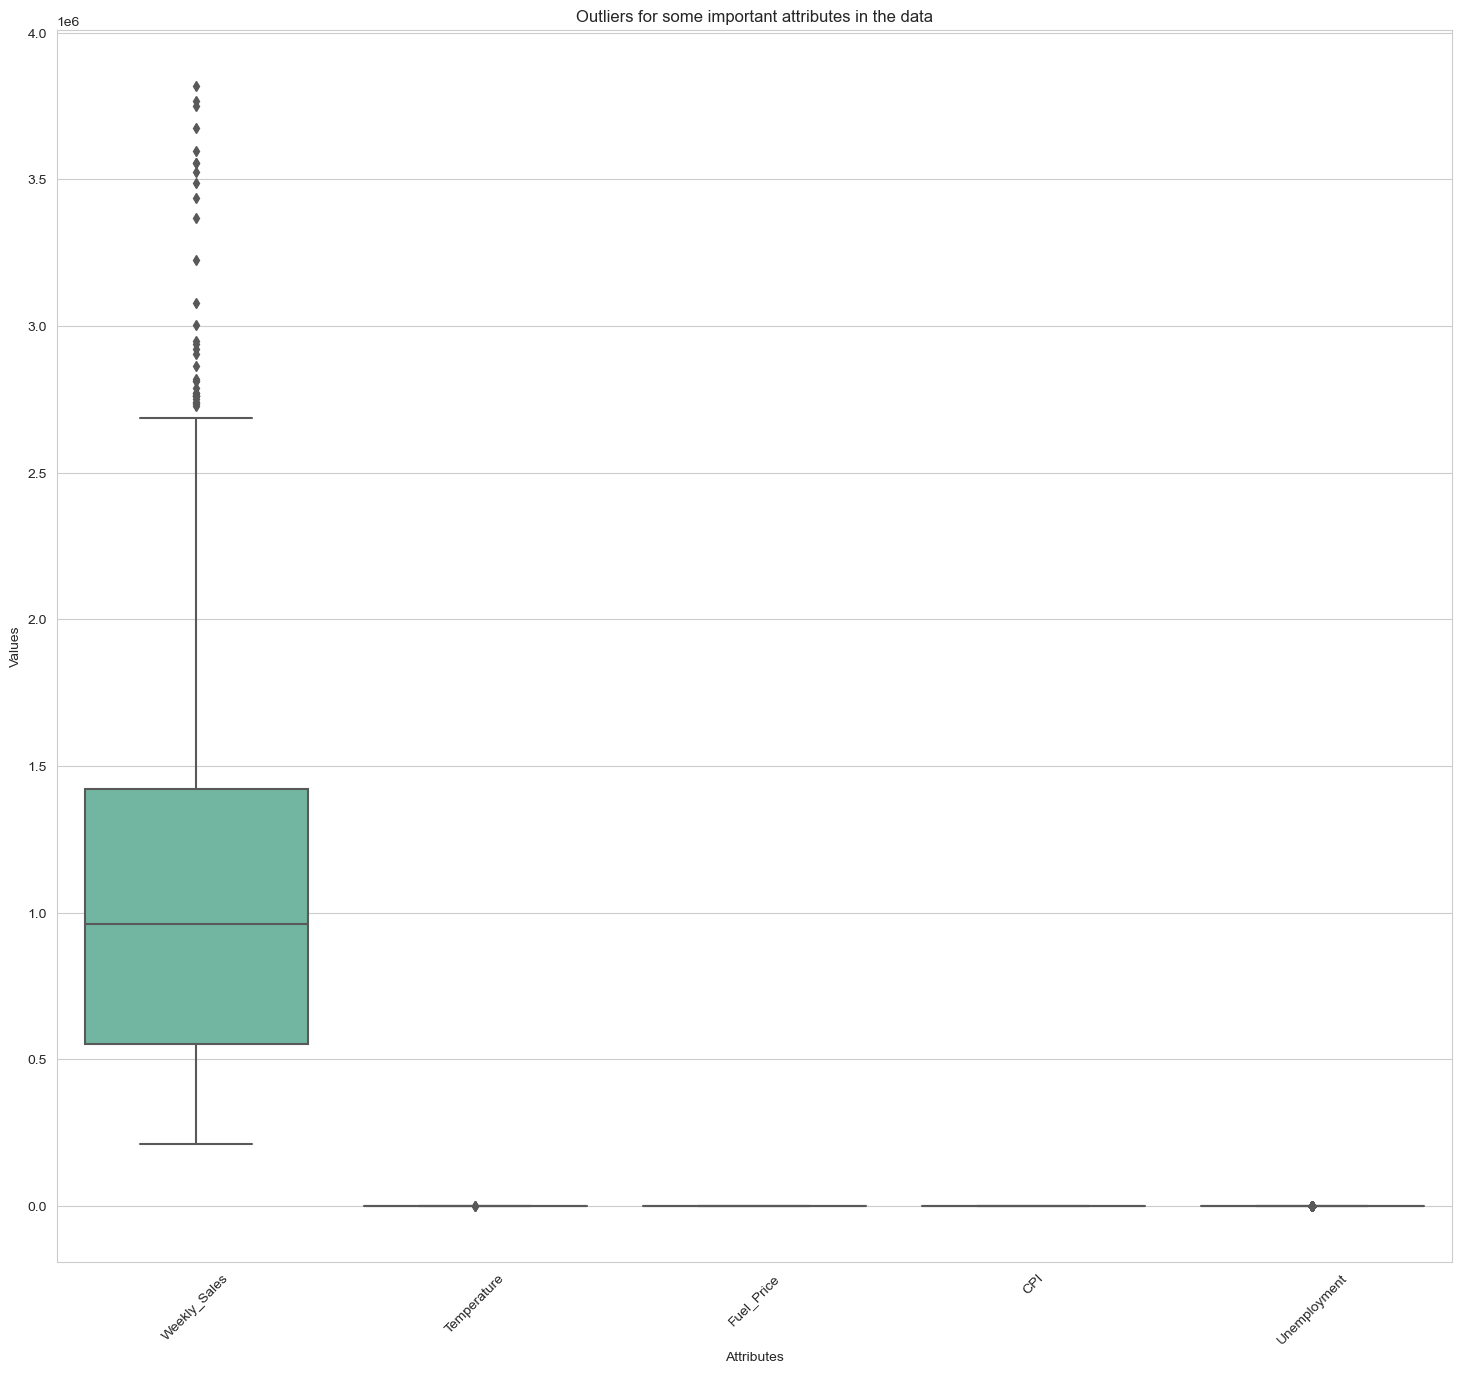

In [13]:
# Create a boxplot that displays the number of outliers existing for each of the attributes
columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
# Set the style and color palette
sns.set_style('whitegrid')
color_palette = sns.color_palette('Set2')

# Create the boxplot
plt.figure(figsize=(18, 16))  # Adjust the figure size as needed
sns.boxplot(data=walmart[columns], palette=color_palette)

# Set plot title and axis labels
plt.title('Outliers for some important attributes in the data')
plt.xlabel('Attributes')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Out of all the attributes, "Weekly_Sales" is the only attribute with the most number of outliers.

## Descriptive Statistics
Descriptive statistics is a branch of statistics that involves summarizing and describing the main characteristics, patterns, and trends of a dataset. It provides a way to understand and interpret data by using numerical and graphical measures.

It can be useful in the following ways:

Data Summarization: Descriptive statistics allows you to summarize the main features of the dataset, such as the mean, median, mode, range, and standard deviation. These measures provide a concise overview of the data distribution, central tendency, and variability, giving you a quick snapshot of the dataset's key characteristics.

Data Exploration: Descriptive statistics helps you explore the dataset and understand its structure. By examining summary statistics, you can identify potential outliers, skewed distributions, or unusual patterns. This exploration aids in formulating research questions, hypotheses, or initial insights into the data.

Data Comparison: Descriptive statistics enables comparisons between different subsets or groups within the dataset. For example, you can compare the average weekly sales between stores, investigate whether holidays impact sales, or examine how temperature or fuel price relates to sales. By analyzing descriptive statistics for different categories or variables, you can gain insights into relationships and differences within the data.

Data Visualization: Descriptive statistics can be complemented with visualizations to enhance data understanding. Graphical representations such as histograms, box plots, scatter plots, or bar charts can visually display the distribution, relationships, and patterns in the dataset. 

Decision Making: Descriptive statistics informs decision-making processes. By understanding the dataset's characteristics and trends, you can make informed decisions based on evidence and data-driven insights.

In [14]:
# Obtain the statistical summary
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Count: The count shows that there are 6,435 records in the dataset, indicating the number of observations for each variable.

Mean: The mean represents the average value of each variable. For example, the average weekly sales across all stores is approximately $1,046,965, and the average temperature is around 60.66 degrees Fahrenheit.

Standard Deviation (Std): The standard deviation measures the dispersion or variability of the data around the mean. A higher standard deviation suggests greater variability. For instance, the standard deviation for weekly sales is approximately $564,366, indicating that sales values can vary significantly from the average.

Min/Max: The minimum and maximum values of each variable represent the smallest and largest observed values, respectively. For example, the minimum weekly sales value is approximately $209,986, and the maximum is approximately $3,818,686.

Quartiles: The quartiles divide the dataset into four equal parts, providing insights into the distribution of the data. The 25th percentile (Q1) represents the value below which 25% of the data falls, while the 75th percentile (Q3) represents the value below which 75% of the data falls. The median, or 50th percentile (Q2), is the value that divides the data into two equal parts. These quartiles provide information about the central tendency and spread of the data.

Interpretation: Based on the summary statistics, we can observe that the dataset contains records from 45 stores. The average weekly sales across all stores is approximately $1,046,965, with a standard deviation of approximately $564,366, indicating a significant variation in sales between different stores.

The dataset also includes a "Holiday_Flag" variable, which indicates whether a particular week includes a holiday or not. Approximately 6.99% of the weeks in the dataset are marked as holidays.

The temperature ranges from approximately -2.06 to 100.14 degrees Fahrenheit, with an average of 60.66 degrees. The fuel price has a mean of 3.36, and the Consumer Price Index (CPI) ranges from 126.06 to 227.23.

Additionally, the dataset includes the unemployment rate, which has an average of approximately 7.99%. These summary statistics provide an overview of the dataset's central tendency, spread, and the range of values observed for each variable.

Overall, these summary statistics provide valuable insights into the distribution and characteristics of the dataset, enabling further analysis and decision-making based on the observed patterns and trends.

## EDA

In [79]:
# Find the number of unique values for each of the attributes
walmart.nunique()

Store               45
Date               143
Weekly_Sales      6435
Holiday_Flag         2
Temperature       3528
Fuel_Price         892
CPI               2145
Unemployment       349
Day                  7
Month               12
Week               127
Quarter             12
Year                 3
Quarter_Number       4
dtype: int64

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

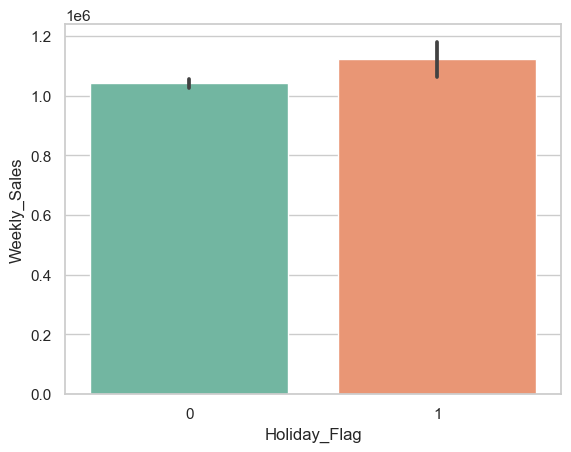

In [78]:
# Create a bar chart to see whether the weekly sales when the weekly sales were the highest (during weeks that contained a holiday or during weeks that did not contain a holiday)
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart)


We can see that the weekly sales of Walmart were the highest during the weeks that contained a holiday vs during the weeks that did not contain a holiday.

In [15]:
# Extract day, month, and year components from the attribute "date" and add these 3 columns into this dataframe
walmart['Day'] = walmart['Date'].dt.day
walmart['Month'] = walmart['Date'].dt.month
walmart['Year'] = walmart['Date'].dt.year

In [16]:
# Create five new columns. 
# We are trying to extract "week", "month", "quarter", "year" & "day" components from the attribute "date"
walmart['week'] = walmart['Date'].dt.strftime('%Y-W%V')
walmart['month'] = walmart['Date'].dt.strftime('%Y-%m')
walmart['quarter'] = walmart['Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
walmart['year'] = walmart['Date'].dt.strftime('%Y')
walmart['Day'] = walmart['Date'].dt.day

In [17]:
# Obtain the first 10 rows of this dataframe to check if these columns have been added
walmart['quarter_number'] = walmart['quarter'].str.replace('\d{4}-', 'Q', regex=True)
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,week,month,quarter,year,quarter_number
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,2010-W17,2010-05,2010-Q2,2010,QQ2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,2010-W48,2010-12,2010-Q4,2010,QQ4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,2010-W07,2010-02,2010-Q1,2010,QQ1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,2010-W08,2010-02,2010-Q1,2010,QQ1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,2010-W18,2010-05,2010-Q2,2010,QQ2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,3,12,2010,2010-W48,2010-12,2010-Q4,2010,QQ4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010,2010-W11,2010-03,2010-Q1,2010,QQ1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010,2010-W12,2010-03,2010-Q1,2010,QQ1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,4,2,2010,2010-W05,2010-02,2010-Q1,2010,QQ1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,4,9,2010,2010-W35,2010-09,2010-Q3,2010,QQ3


In [18]:
# Drop the attribute "Year"
walmart = walmart.drop({'Year'}, axis = 1)
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,week,month,quarter,year,quarter_number
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010-W17,2010-05,2010-Q2,2010,QQ2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010-W48,2010-12,2010-Q4,2010,QQ4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010-W07,2010-02,2010-Q1,2010,QQ1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010-W08,2010-02,2010-Q1,2010,QQ1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010-W18,2010-05,2010-Q2,2010,QQ2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,3,12,2010-W48,2010-12,2010-Q4,2010,QQ4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010-W11,2010-03,2010-Q1,2010,QQ1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010-W12,2010-03,2010-Q1,2010,QQ1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,4,2,2010-W05,2010-02,2010-Q1,2010,QQ1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,4,9,2010-W35,2010-09,2010-Q3,2010,QQ3


In [19]:
walmart = walmart.drop({'month'}, axis = 1)
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,week,quarter,year,quarter_number
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010-W17,2010-Q2,2010,QQ2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010-W48,2010-Q4,2010,QQ4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010-W07,2010-Q1,2010,QQ1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010-W08,2010-Q1,2010,QQ1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010-W18,2010-Q2,2010,QQ2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,3,12,2010-W48,2010-Q4,2010,QQ4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010-W11,2010-Q1,2010,QQ1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010-W12,2010-Q1,2010,QQ1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,4,2,2010-W05,2010-Q1,2010,QQ1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,4,9,2010-W35,2010-Q3,2010,QQ3


In [20]:
# Let us convert the values for the attribute "day" to days of the week, "month" to names of the month
walmart['Day'] = walmart['Date'].dt.day_name()
walmart['Month'] = walmart['Date'].dt.month_name()
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,week,quarter,year,quarter_number
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday,May,2010-W17,2010-Q2,2010,QQ2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,December,2010-W48,2010-Q4,2010,QQ4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday,February,2010-W07,2010-Q1,2010,QQ1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday,February,2010-W08,2010-Q1,2010,QQ1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday,May,2010-W18,2010-Q2,2010,QQ2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,Friday,December,2010-W48,2010-Q4,2010,QQ4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,Friday,March,2010-W11,2010-Q1,2010,QQ1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,Friday,March,2010-W12,2010-Q1,2010,QQ1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,Thursday,February,2010-W05,2010-Q1,2010,QQ1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,Saturday,September,2010-W35,2010-Q3,2010,QQ3


In [21]:
# Rename certain attributes
walmart = walmart.rename({'week': 'Week'}, axis = 1)
walmart = walmart.rename({'quarter':'Quarter'}, axis = 1)
walmart = walmart.rename({'year':'Year'}, axis = 1)
walmart = walmart.rename({'quarter_number':'Quarter_Number'}, axis = 1)
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Week,Quarter,Year,Quarter_Number
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday,May,2010-W17,2010-Q2,2010,QQ2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,December,2010-W48,2010-Q4,2010,QQ4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday,February,2010-W07,2010-Q1,2010,QQ1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday,February,2010-W08,2010-Q1,2010,QQ1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday,May,2010-W18,2010-Q2,2010,QQ2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,Friday,December,2010-W48,2010-Q4,2010,QQ4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,Friday,March,2010-W11,2010-Q1,2010,QQ1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,Friday,March,2010-W12,2010-Q1,2010,QQ1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,Thursday,February,2010-W05,2010-Q1,2010,QQ1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,Saturday,September,2010-W35,2010-Q3,2010,QQ3


In [22]:
# Obtain the descriptive statistics only for the attribute "year"
yearly_statistics = walmart.groupby(['Year']).describe()
yearly_statistics

Store                                               Weekly_Sales  \
       count  mean        std  min   25%   50%   75%   max        count   
Year                                                                      
2010  2160.0  23.0  12.990180  1.0  12.0  23.0  34.0  45.0       2160.0   
2011  2340.0  23.0  12.989949  1.0  12.0  23.0  34.0  45.0       2340.0   
2012  1935.0  23.0  12.990530  1.0  12.0  23.0  34.0  45.0       1935.0   

                    ...         CPI             Unemployment            \
              mean  ...         75%         max        count      mean   
Year                ...                                                  
2010  1.059670e+06  ...  210.329211  215.555730       2160.0  8.492714   
2011  1.046239e+06  ...  214.240846  223.249677       2340.0  8.082036   
2012  1.033660e+06  ...  220.488647  227.232807       1935.0  7.347964   

                                                    
           std    min    25%    50%    75%     max  
Year                                                
2010  1.856717  5.287  7.508  8.200  9.014  14.313  
2011  1.878004  4.420  7.082  7.852  8.523  14.021  
2012  1.699465  3.879  6.228  7.147  8.253  12.187  

[3 rows x 56 columns]

In [23]:
# Obtain the yearly statistics for the attribute "Weekly_Sales"
sub_df = walmart.copy()[["Weekly_Sales", "Year"]]
yearly_statistics = sub_df.groupby(['Year']).describe()
yearly_statistics

Weekly_Sales                                                       \
            count          mean            std        min          25%   
Year                                                                     
2010       2160.0  1.059670e+06  582386.101284  209986.25  542321.2750   
2011       2340.0  1.046239e+06  569773.443767  215359.21  555107.7075   
2012       1935.0  1.033660e+06  536653.455829  236920.49  558529.3650   

                                           
             50%          75%         max  
Year                                       
2010  974696.055  1415445.905  3818686.45  
2011  948390.020  1421470.175  3676388.98  
2012  960476.100  1426382.955  2565259.92

The summary statistics are grouped by year, providing insights into the average weekly sales for each year, along with other statistical measures.

2010: In the year 2010, there are 2,160 observations. The average weekly sales across all stores for this year is approximately $1,059,670, with a standard deviation of approximately $582,386. This indicates a moderate level of variability in weekly sales. The minimum observed weekly sales value is approximately $209,986, while the maximum is approximately $3,818,686. The 25th percentile (Q1) value is around $542,321, the median (50th percentile or Q2) is approximately $974,696, and the 75th percentile (Q3) is around $1,415,445. The maximum value in this year indicates a particularly high sales week compared to others.

2011: In the year 2011, there are 2,340 observations. The average weekly sales for this year is approximately $1,046,239, with a standard deviation of approximately $569,773. Similar to 2010, the minimum weekly sales value is around $215,359, and the maximum is approximately $3,676,389. The 25th percentile (Q1) value is approximately $555,108, the median (50th percentile or Q2) is around $948,390, and the 75th percentile (Q3) is approximately $1,421,470. The statistics for 2011 are comparable to those of 2010, indicating similar sales patterns.

2012: In the year 2012, there are 1,935 observations. The average weekly sales for this year is approximately $1,033,660, with a standard deviation of approximately $536,653. The minimum weekly sales value is approximately $236,920, while the maximum is approximately $2,565,260. The 25th percentile (Q1) value is approximately $558,529, the median (50th percentile or Q2) is around $960,476, and the 75th percentile (Q3) is approximately $1,426,383. The statistics for 2012 are again similar to those of the previous years, indicating consistent sales patterns.

Interpreting these statistics by year allows us to compare and understand the average weekly sales, variability, and distribution patterns over time.

In [26]:
# Obtain the monthly statistics only for the attribute "weekly_sales"
sub_df = walmart.copy()[["Weekly_Sales", "Month"]]
monthly_statistics = sub_df.groupby(['Month']).describe()
monthly_statistics

Weekly_Sales                                                       \
                 count          mean            std        min          25%   
Month                                                                         
April            630.0  1.024324e+06  539350.815196  234218.03  542216.8925   
August           540.0  1.044874e+06  541458.611464  224031.19  575220.2800   
December         495.0  1.210255e+06  740396.849244  215359.21  589714.4900   
February         495.0  1.054597e+06  560597.375597  220060.35  553771.6150   
January          450.0  9.476139e+05  492751.748740  224294.39  525834.3800   
July             585.0  1.014212e+06  521265.560297  224806.96  565297.5400   
June             540.0  1.064848e+06  550777.054555  238172.66  581045.7250   
March            540.0  1.024975e+06  536176.541338  209986.25  551363.3225   
May              585.0  1.035379e+06  542393.445427  239206.26  543384.0100   
November         405.0  1.133751e+06  637010.955087  224639.76  567673.8700   
October          585.0  1.030631e+06  543662.627637  213538.32  550076.3200   
September        585.0  1.009457e+06  530820.751084  229731.98  535937.2500   

                                                  
                   50%           75%         max  
Month                                             
April       946317.135  1.406544e+06  2363601.47  
August      969499.390  1.431740e+06  2283540.30  
December   1078905.680  1.622232e+06  3818686.45  
February    974866.650  1.448975e+06  2495630.51  
January     850238.555  1.303831e+06  2179360.94  
July        951244.660  1.381797e+06  2370116.52  
June        985992.285  1.456554e+06  2565259.92  
March       945516.460  1.396948e+06  2416051.17  
May         972373.810  1.408118e+06  2623469.95  
November   1037687.070  1.535857e+06  3004702.33  
October     956987.810  1.388974e+06  2752122.08  
September   922850.570  1.363461e+06  2546123.78

The table displays the weekly sales data for different months, providing valuable insights into the sales performance throughout the year. Month: This column represents the specific months for which the sales data is provided.

count: It shows the number of weeks included in the sales data for each month. This indicates the sample size or the number of data points available for analysis. A higher count implies a larger dataset, which generally provides a more reliable representation of sales performance.

mean: This column displays the average (mean) weekly sales for each month. The mean represents the typical or average sales level for that particular month. It can be used as a reference point to assess the performance of each month's sales. For example, a higher mean suggests stronger sales, while a lower mean indicates relatively weaker sales.

std: The standard deviation (std) column quantifies the variability or spread in weekly sales for each month. It measures how much the weekly sales data deviates from the mean. A higher standard deviation suggests greater fluctuations in sales, indicating a higher level of volatility or inconsistency in weekly sales performance. Conversely, a lower standard deviation indicates more stability or consistency in sales.

min: This column represents the minimum weekly sales recorded in each month. It provides the lowest value observed during that month. Analyzing the minimum sales value can help identify the weeks or periods with the weakest sales performance.

25% (25th percentile): This column signifies the 25th percentile of the weekly sales. It indicates the value below which 25% of the weeks' sales data falls. In other words, 25% of the weeks had sales below this value. Examining the 25th percentile helps understand the lower range of sales and identify weeks with below-average performance.

50% (50th percentile or median): The 50th percentile column represents the median of the weekly sales. It indicates the midpoint of the sales data, where 50% of the weeks had sales below this value and the other 50% had sales above it. The median offers a measure of central tendency and helps assess the typical sales level, especially in situations where extreme values may distort the mean.

75% (75th percentile): This column represents the 75th percentile of the weekly sales. It indicates the value below which 75% of the weeks' sales data falls. In other words, 75% of the weeks had sales below this value. Analyzing the 75th percentile helps understand the upper range of sales and identify weeks with above-average performance.

max: This column displays the maximum weekly sales recorded in each month. It provides the highest value observed during that month. Analyzing the maximum sales value can help identify the weeks or periods with the strongest sales performance.

By examining these different statistics, you can gain valuable insights into the sales patterns and performance for each month. You can identify months with higher or lower average sales, assess the consistency or variability in weekly sales, and pinpoint weeks that performed exceptionally well or poorly. 

In [28]:
# Obtain the quarterly statistics of Walmart's weekly sales
sub_df = walmart.copy()[["Weekly_Sales", "Quarter"]]
quarterly_statistics = sub_df.groupby(['Quarter']).describe()
quarterly_statistics

Weekly_Sales                                                       \
               count          mean            std        min          25%   
Quarter                                                                     
2010-Q1        405.0  1.037168e+06  550855.889688  209986.25  532765.0500   
2010-Q2        585.0  1.037367e+06  544716.520935  246124.61  535087.9100   
2010-Q3        540.0  1.015756e+06  526281.515025  224031.19  547848.3850   
2010-Q4        630.0  1.132484e+06  669856.643840  213538.32  566701.7900   
2011-Q1        540.0  9.927693e+05  522671.400484  220060.35  537008.1950   
2011-Q2        585.0  1.028999e+06  539774.450269  234218.03  553834.0400   
2011-Q3        630.0  1.021547e+06  537590.899284  224806.96  555715.7925   
2011-Q4        585.0  1.139428e+06  658157.937254  215359.21  577698.3700   
2012-Q1        540.0  1.010722e+06  530660.474011  236920.49  559091.9950   
2012-Q2        585.0  1.055067e+06  547644.786446  244338.31  570045.7900   
2012-Q3        540.0  1.029620e+06  528493.970765  237129.81  554045.3550   
2012-Q4        270.0  1.041236e+06  541685.212997  253731.13  552486.0350   

                                                
                 50%           75%         max  
Quarter                                         
2010-Q1   966145.090  1.404430e+06  2495630.51  
2010-Q2   972663.590  1.399662e+06  2623469.95  
2010-Q3   937951.640  1.371596e+06  2370116.52  
2010-Q4  1023284.480  1.543601e+06  3818686.45  
2011-Q1   898449.735  1.352307e+06  2316495.56  
2011-Q2   947815.050  1.408969e+06  2351143.07  
2011-Q3   933320.045  1.402770e+06  2546123.78  
2011-Q4  1009206.330  1.516924e+06  3676388.98  
2012-Q1   921598.410  1.377982e+06  2427640.17  
2012-Q2   982345.510  1.458059e+06  2565259.92  
2012-Q3   960394.425  1.422381e+06  2283540.30  
2012-Q4   967516.710  1.427645e+06  2462978.28

In [31]:
sub_df = walmart.copy()[["Weekly_Sales", "Week"]]
weekly_statistics = sub_df.groupby(['Week']).describe()
weekly_statistics

Weekly_Sales                                                      \
                count          mean            std        min         25%   
Week                                                                        
2010-W01         45.0  9.386639e+05  484365.601863  224294.39  495692.190   
2010-W05         90.0  1.103792e+06  590329.226374  267495.76  577046.465   
2010-W07         45.0  1.072822e+06  581023.613662  267956.30  511327.900   
2010-W08         45.0  9.770794e+05  518821.583009  270281.63  496083.240   
2010-W10         90.0  1.078925e+06  572613.092608  209986.25  553994.620   
...               ...           ...            ...        ...         ...   
2012-W41         45.0  1.053410e+06  548589.216046  297753.49  576620.310   
2012-W42         45.0  1.002720e+06  513693.005563  254412.34  551969.100   
2012-W43         45.0  1.012091e+06  525993.699077  253731.13  534970.680   
2012-W45         45.0  1.042797e+06  545239.964184  295841.84  579539.950   
2012-W50         45.0  1.025078e+06  530383.215720  291781.15  551799.630   

                                                 
                  50%           75%         max  
Week                                             
2010-W01   865709.110  1.215273e+06  1933719.21  
2010-W05  1035525.665  1.488894e+06  2495630.51  
2010-W07   988467.610  1.491300e+06  2204556.70  
2010-W08   899761.480  1.344354e+06  2095591.63  
2010-W10  1001047.135  1.443915e+06  2416051.17  
...               ...           ...         ...  
2012-W41   973812.790  1.497055e+06  2193367.69  
2012-W42   960945.430  1.363156e+06  2097266.85  
2012-W43   956987.810  1.340233e+06  2149594.46  
2012-W45   967729.350  1.392938e+06  2168097.11  
2012-W50   948613.390  1.412925e+06  2162951.36  

[127 rows x 8 columns]

In [30]:
# Obtain the total weekly sales for each week of the year
sub_df = walmart.copy()[["Weekly_Sales", "Week"]]
Weekly_sales = sub_df.groupby(['Week']).sum().reset_index()
Weekly_sales = Weekly_sales.rename({'Weekly_Sales':'Total Weekly Sales'}, axis = 1)
Weekly_sales

,Week,Total Weekly Sales
0,2010-W01,42239875.87
1,2010-W05,99341315.76
2,2010-W07,48276993.78
3,2010-W08,43968571.13
4,2010-W10,97103285.49
...,...,...
122,2012-W41,47403451.04
123,2012-W42,45122410.57
124,2012-W43,45544116.29
125,2012-W45,46925878.99


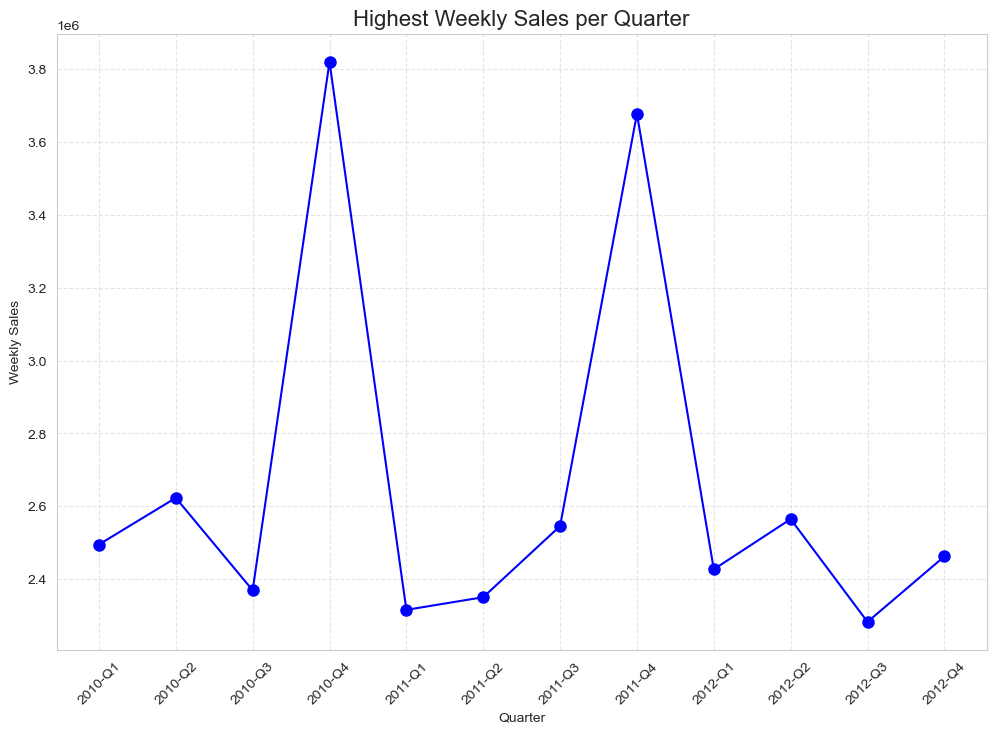

In [34]:
# Create a line chart that displays the weekly sales per quarter

sub_df = walmart.copy()[["Weekly_Sales", "Quarter"]]
quarterly_max = sub_df.groupby(['Quarter']).max()

# Create a line plot to visualize the highest close prices per quarter
plt.figure(figsize=(12, 8))  # Adjust the figure size according to your preference

# Customize the line plot
plt.plot(quarterly_max.index, quarterly_max['Weekly_Sales'], color='b', linestyle='-', marker='o', markersize=8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Weekly Sales')

# Customize the tick labels on x-axis
plt.xticks(quarterly_max.index, rotation=45)

# Add title and adjust the font size
plt.title('Highest Weekly Sales per Quarter', fontsize=16)

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()

This line chart displays the highest weekly sales per quarter.

From the given line chart, we can observe that the 4th quarter of 2010 had the highest weekly sales followed by the 4th quarter of 2011. We can observe that the 3rd quarter of 2012 was the period during which Walmart had the lowest weekly sales. 

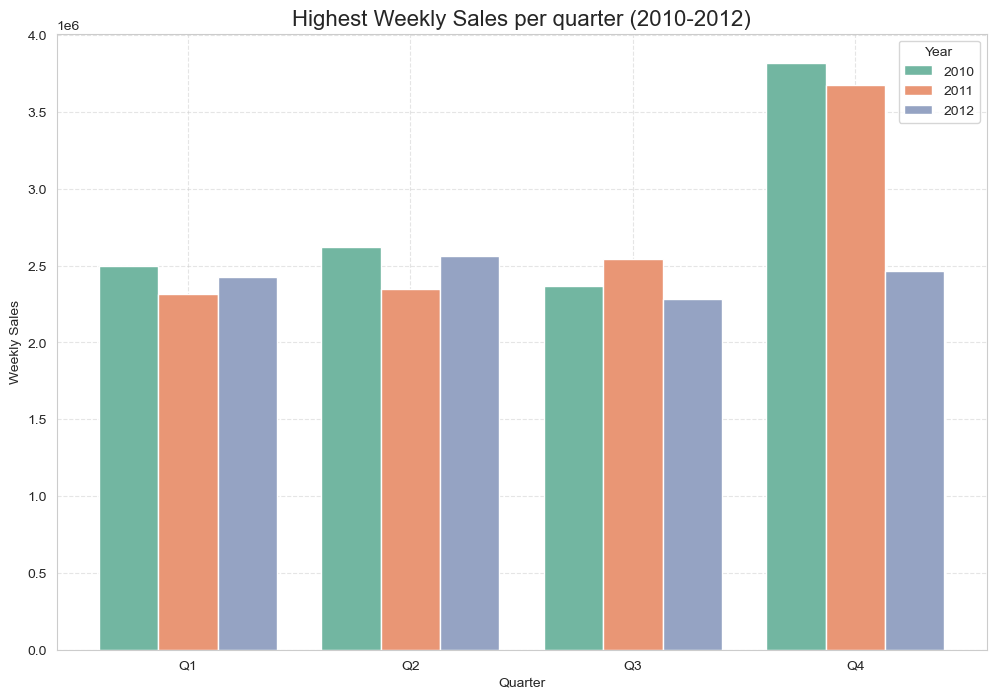

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sub_df = walmart.copy()[["Weekly_Sales", "Quarter", "Year"]]
sub_df['Quarter_Number'] = sub_df['Quarter'].str[-2:]
quarterly_max = sub_df.groupby(['Quarter_Number', 'Year'])['Weekly_Sales'].max().reset_index()

plt.figure(figsize=(12, 8))

# Customize the color palette
sns.set_palette("Set2")

p = sns.barplot(
    data=quarterly_max,
    x='Quarter_Number',
    y='Weekly_Sales',
    hue='Year')



# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Weekly Sales')

# Set title and adjust the font size
plt.title('Highest Weekly Sales per quarter (2010-2012)', fontsize=16)

# Add legend with a title
plt.legend(title='Year')

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()



The fig above is a grouped bar chart displaying the highest weekly sales for Walmart on a quarterly basis for each year.

We can see that the 4th quarter of 2010 had the highest weekly sales followed by the 4th quarter of 2011 and the lowest weekly sales was recorded during the 3rd quarter of 2012. 

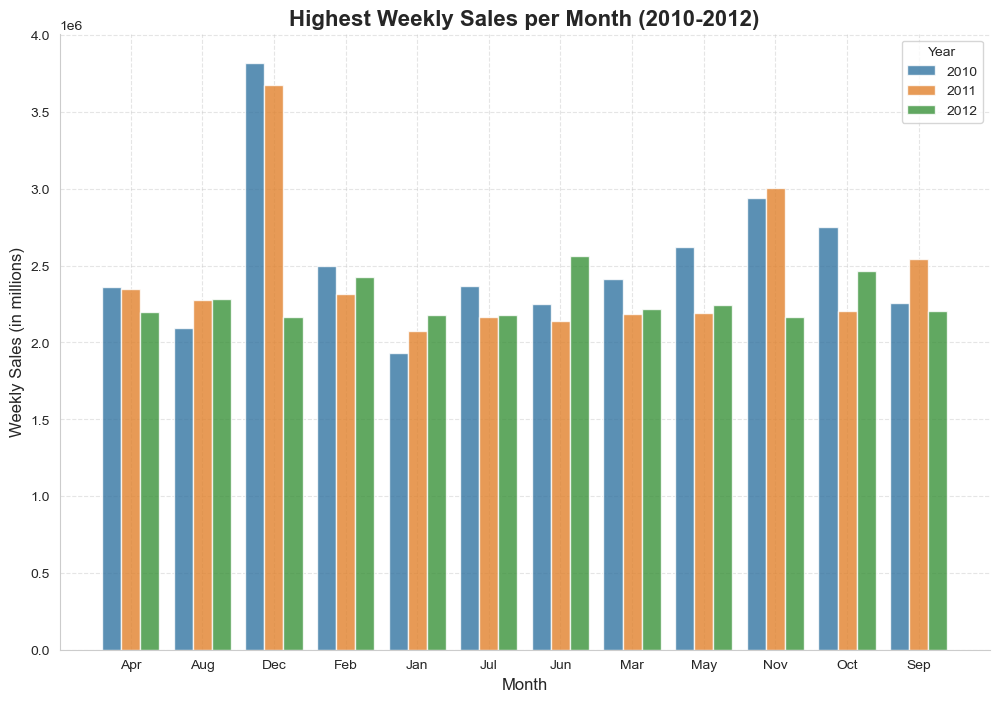

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the relevant columns and update the 'Month' column
sub_df = walmart.copy()[["Weekly_Sales", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)

# Calculate the maximum weekly sales per month and year
monthly_max = sub_df.groupby(['Month', 'Year'])['Weekly_Sales'].max().reset_index()

# Set a stylish color palette
sns.set_palette("tab10")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
p = sns.barplot(
    data=monthly_max,
    x='Month',
    y='Weekly_Sales',
    hue='Year',
    alpha=0.8)


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Month', fontsize=12)
plt.ylabel('Weekly Sales (in millions)', fontsize=12)

# Set title and adjust the font size
plt.title('Highest Weekly Sales per Month (2010-2012)', fontsize=16, fontweight='bold')

# Add legend with a title
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


This is a group bar plot that displays the Highest Weekly sales per month for each of the years.

We can observe that Walmart recorded the highest weekly sales for the year 2010 during the month of Dec followed by the year 2011 in the same month as well. It recorded the lowest weekly sales in the month of Jan during the year 2010.

In [41]:
# Obtain the top 10 Walmart stores with the highest weekly sales
total_sales = walmart.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending = False)

In [43]:

Highest_Sales = pd.DataFrame(total_sales).head(10)
Highest_Sales

,Weekly_Sales
Store,
20,301397792.0
4,299543953.0
14,288999911.0
13,286517704.0
2,275382441.0
10,271617714.0
27,253855917.0
6,223756131.0
1,222402809.0


The results provided represent the weekly sales for different Walmart stores. Here is an interpretation of the results:

Store 20: The store with the highest weekly sales, amounting to $301,397,792. This indicates that Store 20 has been performing exceptionally well in terms of sales.

Store 4: The store with the second-highest weekly sales, totaling $299,543,953. Store 4 is also performing exceptionally well, closely following Store 20 in terms of sales.

Store 14: With weekly sales of $288,999,911, Store 14 secures the third position in terms of sales. It has also demonstrated strong performance.

Store 13: This store has achieved weekly sales of $286,517,704, placing it among the top performers in terms of sales.

Store 2: With weekly sales of $275,382,441, Store 2 ranks fifth in terms of sales. It has shown consistent performance, although slightly behind the top stores.

Store 10: This store has recorded weekly sales of $271,617,714, positioning it as one of the top performers in terms of sales.

Store 27: With weekly sales amounting to $253,855,917, Store 27 is performing well and demonstrates strong sales figures.

Store 6: This store has achieved weekly sales of $223,756,131, indicating a solid performance in terms of sales.

Store 1: With weekly sales of $222,402,809, Store 1 is also performing well, showcasing strong sales figures.

Store 39: This store has recorded weekly sales of $207,445,542, indicating a solid performance in terms of sales.

Overall, these results highlight the top-performing stores in terms of weekly sales. It is essential to analyze the factors contributing to their success, such as location, customer base, marketing strategies, and product offerings. By understanding the strengths and strategies of these high-performing stores, valuable insights can be gained to drive sales growth and improve the performance of other stores within the Walmart chain.

In [46]:
# Create a separate DataFrame for the grouped data
weekly_sales_data = {
    'Store': [20, 4, 14, 13, 2, 10, 27, 6, 1, 39],
    'Weekly_Sales': [301397792.0, 299543953.0, 288999911.0, 286517704.0, 275382441.0, 271617714.0, 253855917.0, 223756131.0, 222402809.0, 207445542.0]
}

weekly_sales_df = pd.DataFrame(weekly_sales_data)

# Display the DataFrame
print(weekly_sales_df)

   Store  Weekly_Sales
0     20   301397792.0
1      4   299543953.0
2     14   288999911.0
3     13   286517704.0
4      2   275382441.0
5     10   271617714.0
6     27   253855917.0
7      6   223756131.0
8      1   222402809.0
9     39   207445542.0


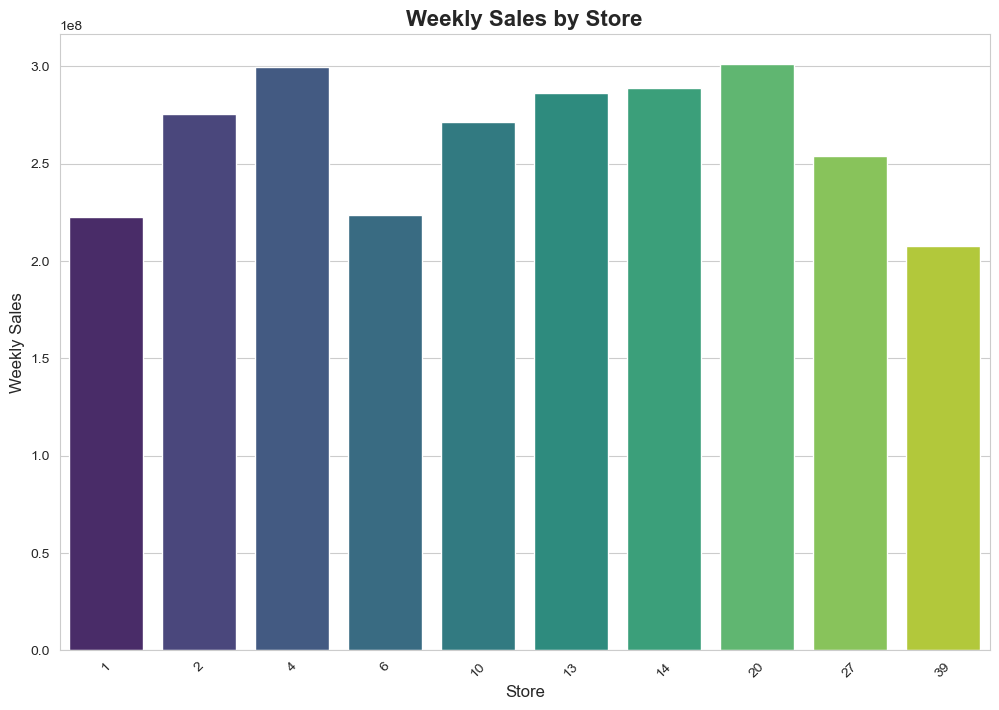

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Store', y='Weekly_Sales', data=weekly_sales_df, palette='viridis')

# Set x-axis and y-axis labels
plt.xlabel('Store', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Set title and adjust the font size
plt.title('Weekly Sales by Store', fontsize=16, fontweight='bold')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


Find the top 10 stores with the highest standard deviation of the weekly sales


In [51]:
df_std = walmart.groupby('Store')['Weekly_Sales'].std().round(3).sort_values(ascending = False)

In [53]:
Highest_Std_Dev = pd.DataFrame(df_std).head(10)
Highest_Std_Dev = Highest_Std_Dev.rename({'Weekly_Sales':'Highest_Std_Weekly_Sales'}, axis = 1)
Highest_Std_Dev

,Highest_Std_Weekly_Sales
Store,
14,317569.949
10,302262.063
20,275900.563
4,266201.442
13,265506.996
23,249788.038
27,239930.136
2,237683.695
39,217466.455


The output represents the stores and their corresponding highest standard deviation (std) of weekly sales. Here's the interpretation of the output:

Store 14 has the highest standard deviation of weekly sales, with a value of 317,569.949. This indicates that the weekly sales for Store 14 vary significantly from week to week.

Store 10 has the second-highest standard deviation, with a value of 302,262.063. It also experiences significant fluctuations in weekly sales.

Store 20 follows closely with a standard deviation of 275,900.563. It demonstrates notable variations in weekly sales.

Store 4 and Store 13 have similar standard deviations, with values of 266,201.442 and 265,506.996, respectively. They both experience considerable fluctuations in weekly sales.

Store 23, Store 27, and Store 2 have standard deviations ranging from 237,683.695 to 249,788.038. While their weekly sales show some variability, it is relatively lower compared to the stores mentioned above.

Store 39 and Store 6 have the lowest standard deviations among the listed stores, with values of 217,466.455 and 212,525.856, respectively. They exhibit relatively stable weekly sales with less variation.

Overall, the standard deviation of weekly sales provides insight into the volatility and variability in sales for each store. Higher standard deviations suggest greater fluctuations, while lower standard deviations indicate more consistent sales patterns. This information can be valuable for identifying stores with higher sales volatility and for making strategic decisions to manage inventory, promotions, and operational aspects of the business.

Find the top 10 stores with an excellent quarterly growth rate during the 3rd quarter of 2012


In [58]:
q2_sales = walmart[(walmart['Date'] >= '2012-04-01') & (walmart['Date'] >= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [59]:
q3_sales = walmart[(walmart['Date'] >= '2012-07-01') & (walmart['Date'] >= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [60]:
pd.DataFrame({'Q2 Sales':q2_sales,
             'Q3 Sales': q3_sales,
             'Difference': (q3_sales - q2_sales),
             'Growth Rate': (q3_sales - q2_sales)/q2_sales*100}).sort_values(by = ['Growth Rate'], ascending = False).head(10)

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
14,30788006.0,10647575.0,-20140431.0,-65.416484
33,4853145.0,1676073.0,-3177072.0,-65.464189
20,37635224.0,12969286.0,-24665938.0,-65.539501
10,32253807.0,11084451.0,-21169356.0,-65.633666
42,10394526.0,3563686.0,-6830840.0,-65.715743
9,9919467.0,3391228.0,-6528239.0,-65.812397
12,17874085.0,6096576.0,-11777509.0,-65.891535
29,9287655.0,3159793.0,-6127862.0,-65.978570
18,18947176.0,6439655.0,-12507521.0,-66.012587


The output presents the Q2 sales, Q3 sales, difference, and growth rate for various stores. Here's the interpretation of the results:

Store 14 had Q2 sales of 30,788,006 and Q3 sales of 10,647,575. The difference between Q2 and Q3 sales is -20,140,431, indicating a decrease in sales. The growth rate is -65.42%, indicating a significant decline in sales from Q2 to Q3.

Store 33 had Q2 sales of 4,853,145 and Q3 sales of 1,676,073. The difference between Q2 and Q3 sales is -3,177,072, showing a decrease in sales. The growth rate is -65.46%, indicating a considerable decline in sales from Q2 to Q3.

Store 20 had Q2 sales of 37,635,224 and Q3 sales of 12,969,286. The difference between Q2 and Q3 sales is -24,665,938, indicating a decrease in sales. The growth rate is -65.54%, reflecting a significant decline in sales from Q2 to Q3.

Store 10 had Q2 sales of 32,253,807 and Q3 sales of 11,084,451. The difference between Q2 and Q3 sales is -21,169,356, indicating a decrease in sales. The growth rate is -65.63%, representing a substantial decline in sales from Q2 to Q3.

Store 42 had Q2 sales of 10,394,526 and Q3 sales of 3,563,686. The difference between Q2 and Q3 sales is -6,830,840, showing a decrease in sales. The growth rate is -65.72%, indicating a significant decline in sales from Q2 to Q3.

Store 9 had Q2 sales of 9,919,467 and Q3 sales of 3,391,228. The difference between Q2 and Q3 sales is -6,528,239, indicating a decrease in sales. The growth rate is -65.81%, representing a notable decline in sales from Q2 to Q3.

Store 12 had Q2 sales of 17,874,085 and Q3 sales of 6,096,576. The difference between Q2 and Q3 sales is -11,777,509, indicating a decrease in sales. The growth rate is -65.89%, reflecting a significant decline in sales from Q2 to Q3.

Store 29 had Q2 sales of 9,287,655 and Q3 sales of 3,159,793. The difference between Q2 and Q3 sales is -6,127,862, showing a decrease in sales. The growth rate is -65.98%, indicating a substantial decline in sales from Q2 to Q3.

Store 18 had Q2 sales of 18,947,176 and Q3 sales of 6,439,655. The difference between Q2 and Q3 sales is -12,507,521, indicating a decrease in sales. The growth rate is -66.01%, representing a significant decline in sales from Q2 to Q3.

Store 22 had Q2 sales of 17,901,164 and Q3 sales of 6,082,620. The difference between Q2 and Q3 sales is -11,818,544, indicating a decrease in sales. The growth rate is -66.02%, reflecting a substantial decline in sales from Q2 to Q3.

Find the top 10 stores with an excellent quarterly growth rate during the 3rd quarter of 2011


In [62]:
q2_sales = walmart[(walmart['Date'] >= '2011-04-01') & (walmart['Date'] >= '2011-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [63]:
q3_sales = walmart[(walmart['Date'] >= '2011-07-01') & (walmart['Date'] >= '2011-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [64]:
pd.DataFrame({'Q2 Sales':q2_sales,
             'Q3 Sales': q3_sales,
             'Difference': (q3_sales - q2_sales),
             'Growth Rate': (q3_sales - q2_sales)/q2_sales*100}).sort_values(by = ['Growth Rate'], ascending = False).head(10)

,Q2 Sales,Q3 Sales,Difference,Growth Rate
Store,,,,
3,28962405.0,23989063.0,-4973342.0,-17.171716
5,22812012.0,18875403.0,-3936609.0,-17.256737
44,22354114.0,18466812.0,-3887302.0,-17.389649
12,71185738.0,58775632.0,-12410106.0,-17.433416
38,29127766.0,24048254.0,-5079512.0,-17.438728
9,39241326.0,32373552.0,-6867774.0,-17.501381
39,107158749.0,88377499.0,-18781250.0,-17.526567
18,74183375.0,61142607.0,-13040768.0,-17.579098
2,133823581.0,110253042.0,-23570539.0,-17.613143


Store 3 had Q2 sales of 28,962,405 and Q3 sales of 23,989,063. The difference between Q2 and Q3 sales is -4,973,342, indicating a decrease in sales. The growth rate is -17.17%, representing a moderate decline in sales from Q2 to Q3.

Store 5 had Q2 sales of 22,812,012 and Q3 sales of 18,875,403. The difference between Q2 and Q3 sales is -3,936,609, showing a decrease in sales. The growth rate is -17.26%, indicating a moderate decline in sales from Q2 to Q3.

Store 44 had Q2 sales of 22,354,114 and Q3 sales of 18,466,812. The difference between Q2 and Q3 sales is -3,887,302, indicating a decrease in sales. The growth rate is -17.39%, representing a moderate decline in sales from Q2 to Q3.

Store 12 had Q2 sales of 71,185,738 and Q3 sales of 58,775,632. The difference between Q2 and Q3 sales is -12,410,106, indicating a decrease in sales. The growth rate is -17.43%, reflecting a moderate decline in sales from Q2 to Q3.

Store 38 had Q2 sales of 29,127,766 and Q3 sales of 24,048,254. The difference between Q2 and Q3 sales is -5,079,512, showing a decrease in sales. The growth rate is -17.44%, representing a moderate decline in sales from Q2 to Q3.

Store 9 had Q2 sales of 39,241,326 and Q3 sales of 32,373,552. The difference between Q2 and Q3 sales is -6,867,774, indicating a decrease in sales. The growth rate is -17.50%, reflecting a moderate decline in sales from Q2 to Q3.

Store 39 had Q2 sales of 107,158,749 and Q3 sales of 88,377,499. The difference between Q2 and Q3 sales is -18,781,250, indicating a decrease in sales. The growth rate is -17.53%, representing a moderate decline in sales from Q2 to Q3.

Store 18 had Q2 sales of 74,183,375 and Q3 sales of 61,142,607. The difference between Q2 and Q3 sales is -13,040,768, indicating a decrease in sales. The growth rate is -17.58%, reflecting a moderate decline in sales from Q2 to Q3.

Store 2 had Q2 sales of 133,823,581 and Q3 sales of 110,253,042. The difference between Q2 and Q3 sales is -23,570,539, indicating a decrease in sales. The growth rate is -17.61%, representing a moderate decline in sales from Q2 to Q3.

Store 34 had Q2 sales of 68,391,655 and Q3 sales of 56,289,268. The difference between Q2 and Q3 sales is -12,102,387, indicating a decrease in sales. The growth rate is -17.70%, reflecting a moderate decline in sales from Q2 to Q3.

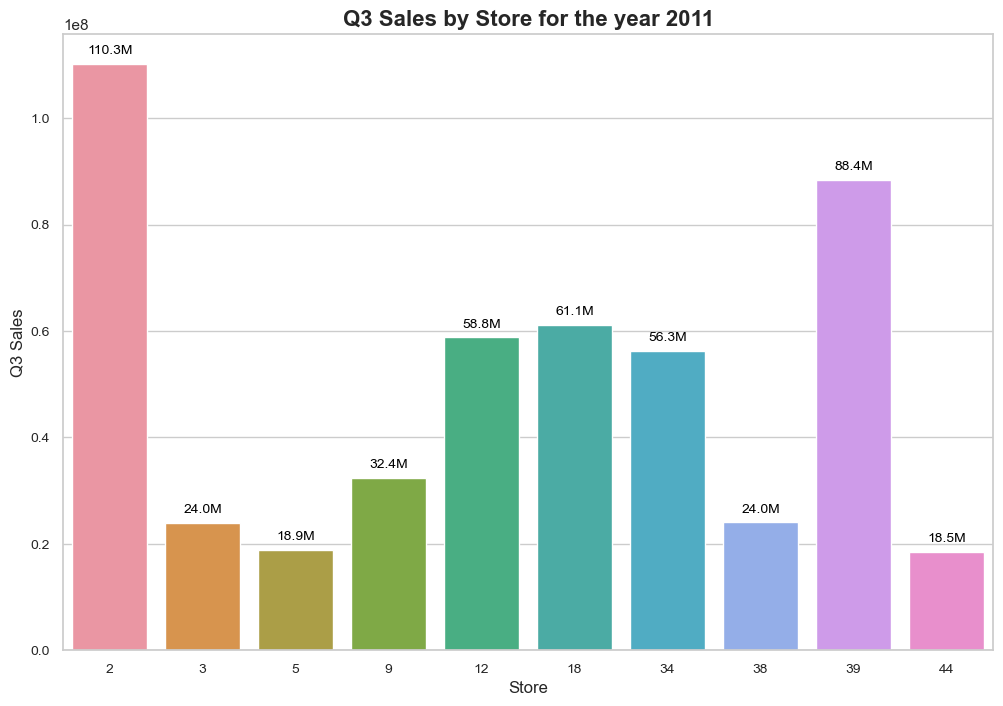

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the given data
data = {
    'Store': [3, 5, 44, 12, 38, 9, 39, 18, 2, 34],
    'Q2 Sales': [28962405, 22812012, 22354114, 71185738, 29127766, 39241326, 107158749, 74183375, 133823581, 68391655],
    'Q3 Sales': [23989063, 18875403, 18466812, 58775632, 24048254, 32373552, 88377499, 61142607, 110253042, 56289268],
    'Difference': [-4973342, -3936609, -3887302, -12410106, -5079512, -6867774, -18781250, -13040768, -23570539, -12102387],
    'Growth Rate': [-17.171716, -17.256737, -17.389649, -17.433416, -17.438728, -17.501381, -17.526567, -17.579098, -17.613143, -17.695707]
}
df = pd.DataFrame(data)
df = df.set_index('Store')

# Set style and color palette
sns.set(style="whitegrid")
sns.set_palette("Set2")

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart
p = sns.barplot(data=df, x=df.index, y='Q3 Sales')

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        f"{round(b.get_height() / 1000000, 1)}M",
        (b.get_x() + b.get_width() / 2., b.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10,
        color='black'
    )

# Customize the plot
plt.title("Q3 Sales by Store for the year 2011", fontsize=16, fontweight='bold')
plt.xlabel("Store", fontsize=12)
plt.ylabel("Q3 Sales", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


From the given bar chart, we can infer that store 2 followed by the stores 39 & 18 generated the highest sales during the 3rd quarter of 2011.

Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [68]:
# Holiday Events
Super_Bowl = ['12-2-2010', '11-02-2011', '10-2-2012']
Labour_Day = ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [69]:
# Calculating Holiday Events Sales
Super_Bowl_Sales = walmart.loc[walmart.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_Sales = walmart.loc[walmart.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round(2)
Thanksgiving_Sales = walmart.loc[walmart.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_Sales = walmart.loc[walmart.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)


C:\Users\User\AppData\Local\Temp\ipykernel_5576\1980414733.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Thanksgiving_Sales = walmart.loc[walmart.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_5576\1980414733.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Christmas_Sales = walmart.loc[walmart.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)


In [70]:
Super_Bowl_Sales, Labour_Day_Sales, Thanksgiving_Sales, Christmas_Sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [71]:
non_holiday_sales = walmart[(walmart['Holiday_Flag'] == 0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [73]:
result = pd.DataFrame([{'Super Bowl Sales': Super_Bowl_Sales,
                       'Labour Day Sales': Labour_Day_Sales,
                       'Thanksgiving Sales': Thanksgiving_Sales,
                       'Christmas Sales': Christmas_Sales,
                       'Non Holiday Sales': non_holiday_sales}]).T
result

,0
Super Bowl Sales,1079127.99
Labour Day Sales,1042427.29
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
Non Holiday Sales,1041256.38


When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. Among all the holidays, the weekly sales seemed to be the highest for Walmart on Thanksgiving and the average weekly sales on this day is much higher than non-holiday sales ($1,041,256.38). 

I would like to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [80]:
# Super bowl dates in train set
walmart.loc[(walmart['Date'] == '2010-02-12')|(walmart['Date'] == '2011-02-11')|(walmart['Date'] == '2012-02-10'),'Super_Bowl'] = True
walmart.loc[(walmart['Date'] != '2010-02-12')&(walmart['Date'] != '2011-02-11')&(walmart['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [82]:
# Labor day dates in train set
walmart.loc[(walmart['Date'] == '2010-09-10')|(walmart['Date'] == '2011-09-09')|(walmart['Date'] == '2012-09-07'),'Labor_Day'] = True
walmart.loc[(walmart['Date'] != '2010-09-10')&(walmart['Date'] != '2011-09-09')&(walmart['Date'] != '2012-09-07'),'Labor_Day'] = False

In [84]:
# Thanksgiving dates in train set
walmart.loc[(walmart['Date'] == '2010-11-26')|(walmart['Date'] == '2011-11-25'),'Thanksgiving'] = True
walmart.loc[(walmart['Date'] != '2010-11-26')&(walmart['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [86]:
#Christmas dates in train set
walmart.loc[(walmart['Date'] == '2010-12-31')|(walmart['Date'] == '2011-12-30'),'Christmas'] = True
walmart.loc[(walmart['Date'] != '2010-12-31')&(walmart['Date'] != '2011-12-30'),'Christmas'] = False

Text(0.5, 1.0, 'Weekly Sales (Christmas holidays Vs Non-Christmas Holidays)')

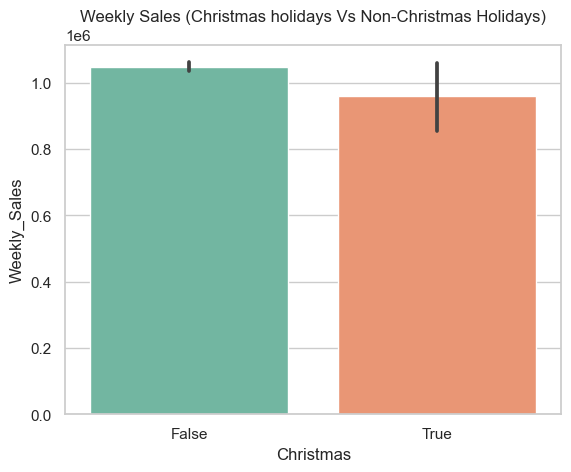

In [88]:
# Create a bar chart to check whether the weekly sales were the highest during Christmas holidays or non-christmas holidays
sns.barplot(x='Christmas', y='Weekly_Sales', data=walmart) # Christmas holiday vs not-Christmas
plt.title("Weekly Sales (Christmas holidays Vs Non-Christmas Holidays)")

This given bar chart tells us that the weekly sales during non-christmas holidays were much higher than the Christmas holidays.

Text(0.5, 1.0, 'Weekly Sales (Thanksgiving holidays Vs Non-Thanksgiving Holidays)')

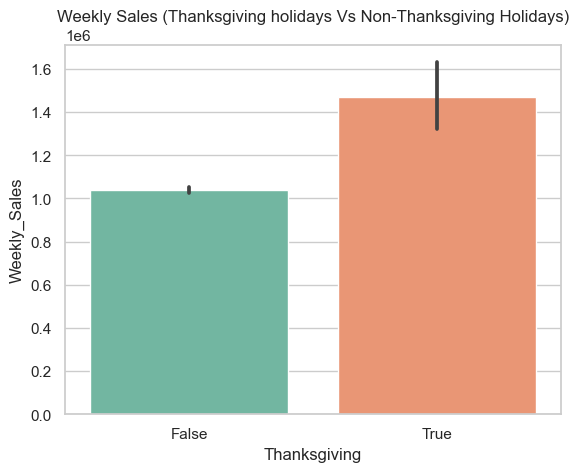

In [89]:
# Check the weekly sales for thanksgiving vs non-thanksgiving holidays
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=walmart) # Thanksgiving holiday vs not-thanksgiving
plt.title("Weekly Sales (Thanksgiving holidays Vs Non-Thanksgiving Holidays)")

This plot shows the sales for thanksgiving & non-thanksgiving holidays and it clearly tells us that the sales were way higher during the thanksgiving holidays as compared to the Non-Thanksgiving holidays. 

Text(0.5, 1.0, 'Weekly Sales (Super Bowl holidays Vs Non-Super Bowl Holidays)')

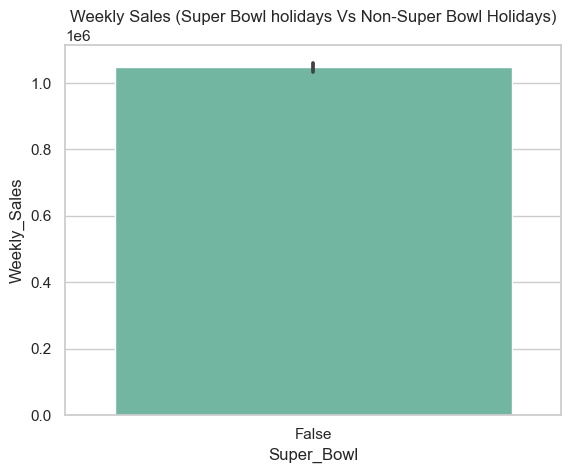

In [93]:
# Check the weekly sales for super bowl vs non-super bowl holidays
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=walmart) # Super bowl holiday vs not-super bowl
plt.title("Weekly Sales (Super Bowl holidays Vs Non-Super Bowl Holidays)")

Text(0.5, 1.0, 'Weekly Sales (Labour Day holidays Vs Non-Labour Day Holidays)')

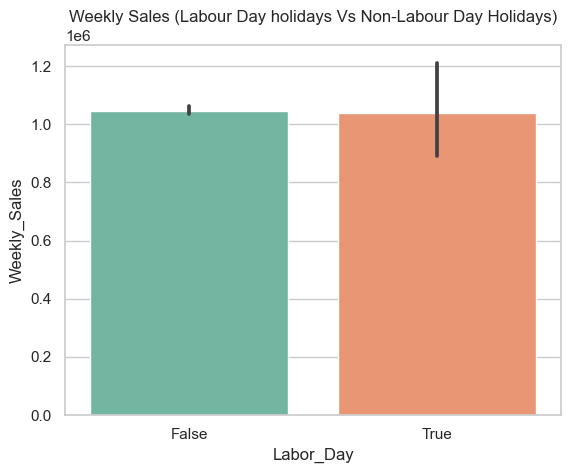

In [91]:
# Check whether the sales were higher during Labour Day holidays vs Non-Labour Day holidays
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=walmart) # Labor day holiday vs not-labor day
plt.title("Weekly Sales (Labour Day holidays Vs Non-Labour Day Holidays)")

This bar plot shows the sales during Labour day and non-labour day holidays. From this plot, we can infer that there doesn't seem to be much of a difference in the weekly sales between the labour day and non-labour day holidays. The sales during the non-labour day holidays is slightly higher than the sales during labour day holidays.

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week.

Create a plot that displays the monthly and semester view of sales in units and provide insights

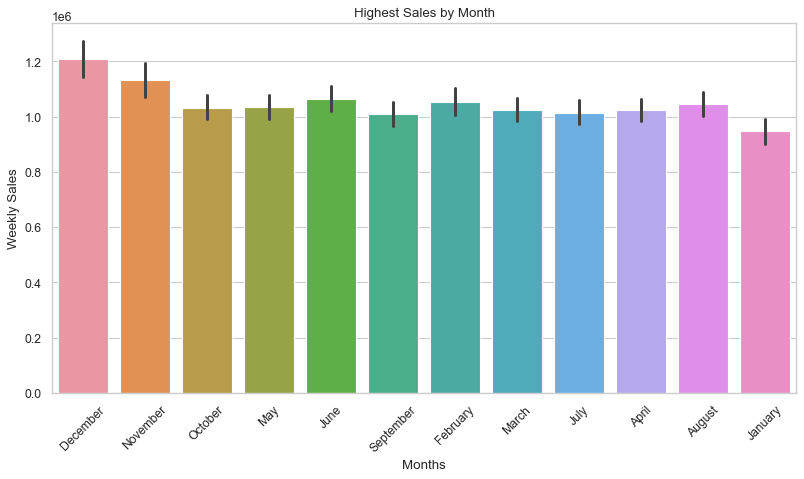

In [76]:
# Monthwise sales
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dataset by Weekly_Sales in descending order
sorted_walmart = walmart.sort_values('Weekly_Sales', ascending=False)

# Set the figure size and dpi
plt.figure(figsize=(12, 6), dpi=80)

# Create a bar plot with seaborn
sns.barplot(x='Month', y='Weekly_Sales', data=sorted_walmart)

# Customize the plot
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('Highest Sales by Month')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


This bar chart shows the monthly sales data for Walmart. Each bar represents a month, and the height of the bar represents the total weekly sales during that month. The bars are sorted from highest to lowest, so we can easily see which months had the highest sales. This helps us identify the months when Walmart made the most money. By looking at the chart, we can quickly see the months with the highest sales and compare them to other months. This information can help us understand the patterns and trends in Walmart's sales throughout the year.

From the given chart, we can observe that the highest sales were recorded in the month of Dec followed by the month "Nov" & "Oct".


Text(0.5, 1.0, 'Walmart Yearly Sales')

<Figure size 800x560 with 0 Axes>

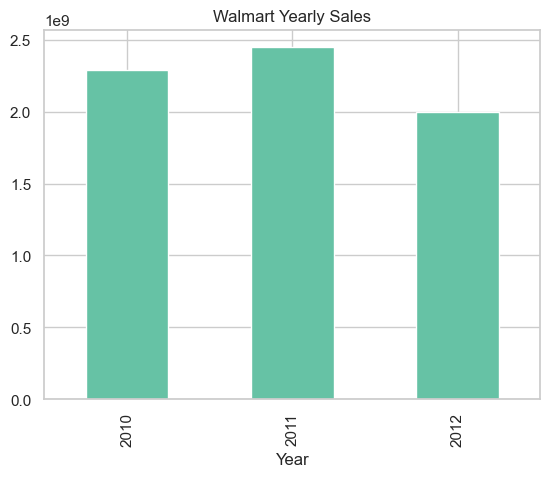

In [77]:
# Yearly Sales
plt.figure(figsize = (10, 7), dpi = 80)
walmart.groupby('Year')[['Weekly_Sales']].sum().plot(kind = 'bar', legend = False)
plt.title("Walmart Yearly Sales")

From the given bar chart, we can observe that the sales were the highest in the year 2011 and the year 2012 had the lowest sales. 

In [98]:
# Check the weeks with the highest average sales
weekly_sales = walmart.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
weekly_sales

Week
2010-W51    1.798476e+06
2011-W51    1.711072e+06
2011-W47    1.479858e+06
2010-W47    1.462689e+06
2010-W50    1.373796e+06
2011-W50    1.335238e+06
2012-W23    1.163948e+06
2012-W07    1.115490e+06
2010-W14    1.115301e+06
2012-W40    1.111320e+06
Name: Weekly_Sales, dtype: float64

In [107]:
# Extract the weeks by splitting the index on the '-' character and selecting the second part
week = weekly_sales.index.str.split('-').str[1]

# Remove the years from the weeks by removing any non-digit characters
week = week.str.replace('\D', '')

# Print the resulting weeks
print(week)


Index(['01', '05', '07', '08', '10', '11', '12', '14', '15', '16',
       ...
       '36', '37', '38', '39', '40', '41', '42', '43', '45', '50'],
      dtype='object', name='Week', length=127)


C:\Users\User\AppData\Local\Temp\ipykernel_5576\3230076621.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  week = week.str.replace('\D', '')


C:\Users\User\AppData\Local\Temp\ipykernel_5576\14321359.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


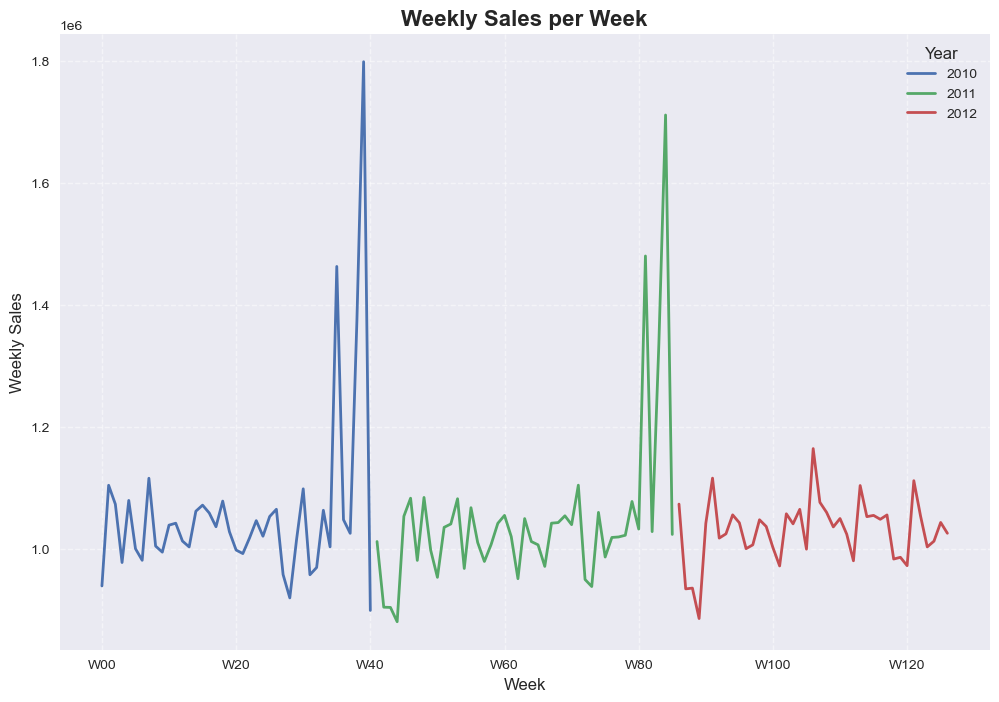

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the pivot table
weekly_sales = pd.pivot_table(walmart, values="Weekly_Sales", columns="Year", index="Week")

# Set the style
plt.style.use('seaborn')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
weekly_sales.plot(ax=ax, linewidth=2)

# Customize the x-axis labels
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"W{int(x):02d}"))

# Set the title and labels
plt.title("Weekly Sales per Week", fontsize=16, fontweight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)

# Customize the legend
plt.legend(title="Year", fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()



The line plot represents the weekly sales of Walmart over time, specifically for each week. The x-axis represents the weeks, labeled as "W01", "W02", and so on, indicating the week number. The y-axis represents the weekly sales amount in dollars.

The plot shows multiple lines, each corresponding to a different year. The legend on the right side indicates the years represented by the lines. By comparing the lines, we can observe the trends and patterns in weekly sales across different years.

This plot helps visualize the variations in weekly sales over time, allowing us to identify any seasonal patterns or trends that may exist. It provides an overview of the sales performance of Walmart on a weekly basis, aiding in decision-making and understanding the business's sales patterns.













C:\Users\User\AppData\Local\Temp\ipykernel_5576\1187544758.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


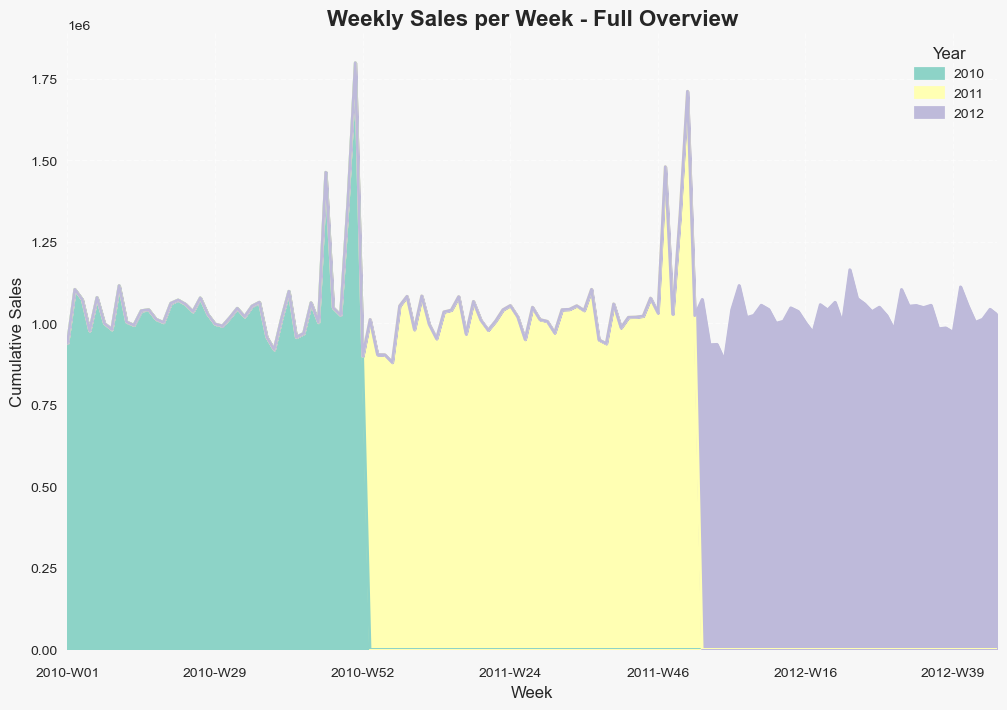

In [123]:
# Create a stacked area chart for the same
import pandas as pd
import matplotlib.pyplot as plt

# Create the pivot table
weekly_sales = pd.pivot_table(walmart, values="Weekly_Sales", columns="Year", index="Week")

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define color palette
colors = plt.cm.Set3(range(len(weekly_sales.columns)))

# Plot the data as stacked area with custom colors
weekly_sales.plot.area(ax=ax, linewidth=2, color=colors)

# Set the title and labels
plt.title("Weekly Sales per Week - Full Overview", fontsize=16, fontweight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Cumulative Sales", fontsize=12)

# Customize the legend
plt.legend(title="Year", fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the plot margins
plt.margins(0)

# Add a background color
fig.patch.set_facecolor('#f7f7f7')
ax.set_facecolor('#f7f7f7')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis tick parameters
ax.tick_params(axis='x', rotation=0, length=6, width=1, color='black')

# Set y-axis tick parameters
ax.tick_params(axis='y', length=0)

# Increase font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

## Modelling

In [125]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Week,Quarter,Year,Quarter_Number,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday,May,2010-W17,2010-Q2,2010,QQ2,False,False,False,False
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,December,2010-W48,2010-Q4,2010,QQ4,False,False,False,False
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday,February,2010-W07,2010-Q1,2010,QQ1,False,False,False,False
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday,February,2010-W08,2010-Q1,2010,QQ1,False,False,False,False
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday,May,2010-W18,2010-Q2,2010,QQ2,False,False,False,False


In [127]:
walmart = walmart.drop(['Day', 'Month', 'Week', 'Quarter', 'Year', 'Quarter_Number', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'], axis = 1)
model = walmart.drop(['Date'], axis = 1)
model.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


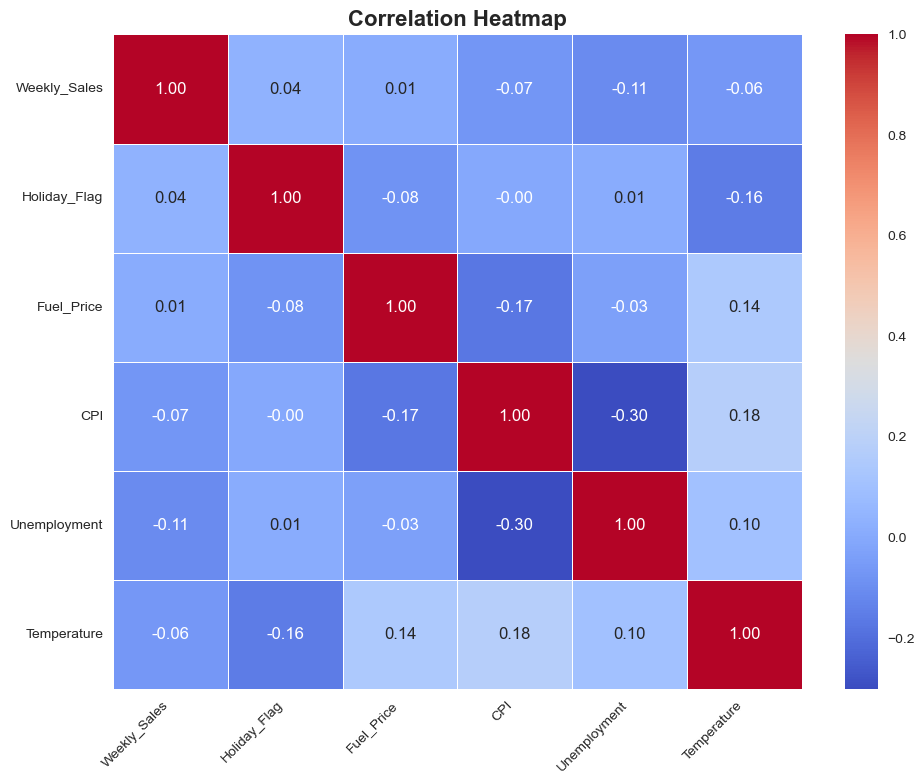

In [129]:
# Create a correlation heatmap
model_imp = model.copy()[["Weekly_Sales", "Holiday_Flag", "Fuel_Price", "CPI", "Unemployment", "Temperature"]]
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = model_imp.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a color map
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the correlation heatmap
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

# Set the title
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate the y-axis labels
plt.yticks(rotation=0)

# Adjust the plot margins
plt.tight_layout()

# Show the plot
plt.show()


From the given correlation heatmap, we can make the following inferences:

1. Both the attributes "Holiday_Flag" & "Fuel_Price" have a  positive correlation with the "Weekly_Sales". This means that as Holiday and Fuel_Price increase, the weekly sales tend to increase as well. This positive correlation suggests that these factors may have a similar impact on sales.

2. The correlation between Weekly_Sales and Holiday_Flag appears to be relatively weak. The correlation coefficient is slightly positive, suggesting that weeks with holidays may have slightly higher sales, but the relationship is not very strong.

3. Weekly_Sales also has a negative correlation with Unemployment. As the unemployment rate increases, the weekly sales tend to decrease. This negative correlation implies that lower unemployment rates may be associated with higher sales.

4. Temperature does not show a strong correlation with Weekly_Sales. The correlation coefficient is close to zero, indicating a weak or no linear relationship between these variables.



<Figure size 1000x600 with 0 Axes>

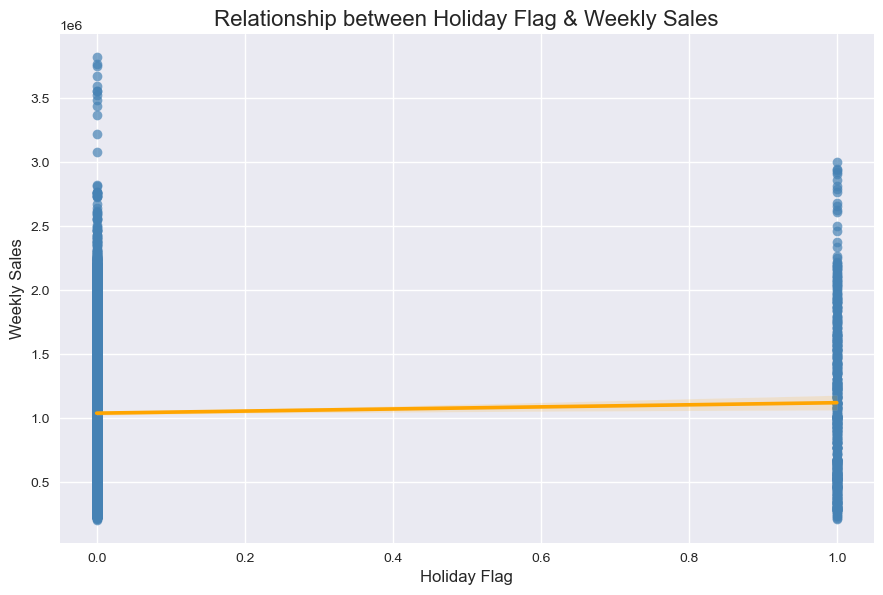

In [130]:
# Create a linear model plot to display the relationship between "Holiday_Flag" & "Weekly_Sales"
# Set the style
sns.set_style('darkgrid')

# Create the linear model plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=model, x='Holiday_Flag', y='Weekly_Sales', height=6, aspect=1.5, scatter_kws={'alpha': 0.7, 'color': 'steelblue'}, line_kws={'color': 'orange'})

# Set the labels and title
plt.title('Relationship between Holiday Flag & Weekly Sales', fontsize=16)
plt.xlabel('Holiday Flag', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Set the font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

This plot shows the relationship between the Holiday Flag and Weekly Sales based on the Walmart sales dataset. The Holiday Flag is a binary variable that indicates whether a given week includes a holiday (1) or not (0), while Weekly Sales represent the amount of sales made each week.

Interpreting the plot:

The scatter points, represented by the blue dots, are spread out on the graph. They show a general pattern where the Weekly Sales tend to be higher during weeks with a Holiday Flag of 1 (holiday week) compared to weeks with a Holiday Flag of 0 (non-holiday week).

The orange line on the plot is called the "best-fit line" or the "regression line." It summarizes the overall relationship between the Holiday Flag and Weekly Sales based on the available data points. In this case, the line shows a slight positive slope, indicating a positive relationship between the Holiday Flag and Weekly Sales.

The positive slope means that, on average, weeks with a Holiday Flag of 1 (holiday weeks) tend to have higher Weekly Sales compared to weeks with a Holiday Flag of 0 (non-holiday weeks). This suggests that holidays may lead to increased sales, possibly due to factors such as increased consumer spending, promotional offers, or seasonal demand.

<Figure size 1000x600 with 0 Axes>

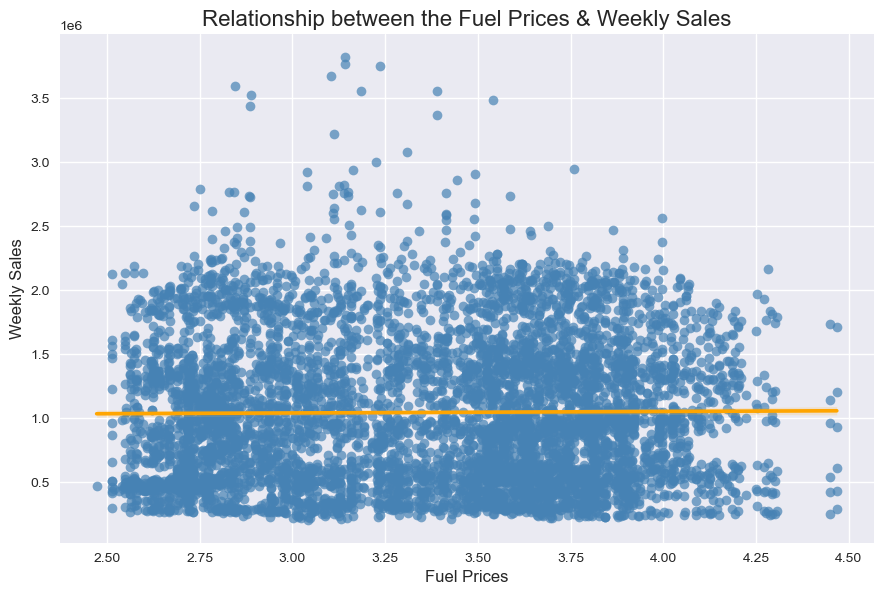

In [131]:
# Set the style
sns.set_style('darkgrid')

# Create the linear model plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=model, x='Fuel_Price', y='Weekly_Sales', height=6, aspect=1.5, scatter_kws={'alpha': 0.7, 'color': 'steelblue'}, line_kws={'color': 'orange'})

# Set the labels and title
plt.title('Relationship between the Fuel Prices & Weekly Sales', fontsize=16)
plt.xlabel('Fuel Prices', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Set the font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

This plot shows the relationship between Fuel Prices and Weekly Sales based on the Walmart sales dataset. Fuel Prices represent the average price of fuel during a given period, while Weekly Sales indicate the amount of sales made each week.

Interpreting the plot:

The scatter points, represented by the blue dots, are spread out on the graph. They show a general pattern where as the Fuel Prices increase, the Weekly Sales tend to slightly increase as well.

The orange line on the plot is called the "best-fit line" or the "regression line." It summarizes the overall relationship between Fuel Prices and Weekly Sales based on the available data points. In this case, the line has a slight positive slope, indicating a positive relationship between Fuel Prices and Weekly Sales.

The positive slope means that, on average, as Fuel Prices increase, the Weekly Sales also tend to increase. This suggests that higher fuel prices may have a small positive impact on sales, possibly due to factors such as increased transportation costs or changes in consumer behavior.

<Figure size 1000x600 with 0 Axes>

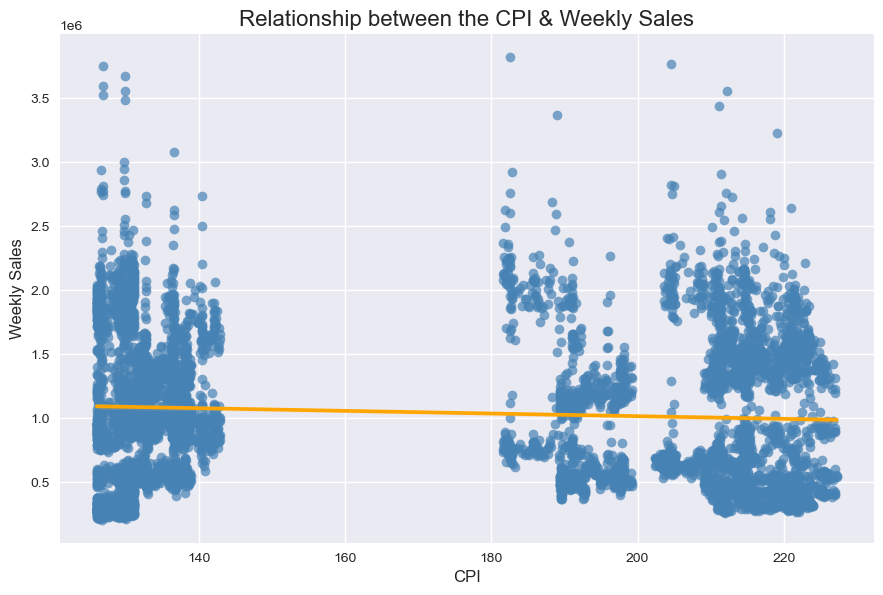

In [132]:
# Set the style
sns.set_style('darkgrid')

# Create the linear model plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=model, x='CPI', y='Weekly_Sales', height=6, aspect=1.5, scatter_kws={'alpha': 0.7, 'color': 'steelblue'}, line_kws={'color': 'orange'})

# Set the labels and title
plt.title('Relationship between the CPI & Weekly Sales', fontsize=16)
plt.xlabel('CPI', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Set the font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

This plot shows the relationship between the Consumer Price Index (CPI) and Weekly Sales based on the Walmart sales dataset. The CPI represents the general price level of goods and services, while Weekly Sales indicate the amount of sales made each week.

Interpreting the plot:

The scatter points, represented by the blue dots, are spread out across the graph. They show a general pattern where as the CPI increases, the Weekly Sales tend to decrease.

The orange line on the plot is called the "best-fit line" or the "regression line." It summarizes the overall relationship between the CPI and Weekly Sales based on the available data points. In this case, the line has a downward slope, indicating a negative relationship between the CPI and Weekly Sales.

The negative slope means that as the CPI increases, the Weekly Sales tend to decrease. This suggests that when prices rise (as indicated by the CPI), customers may be more cautious with their spending, leading to lower sales.

<Figure size 1000x600 with 0 Axes>

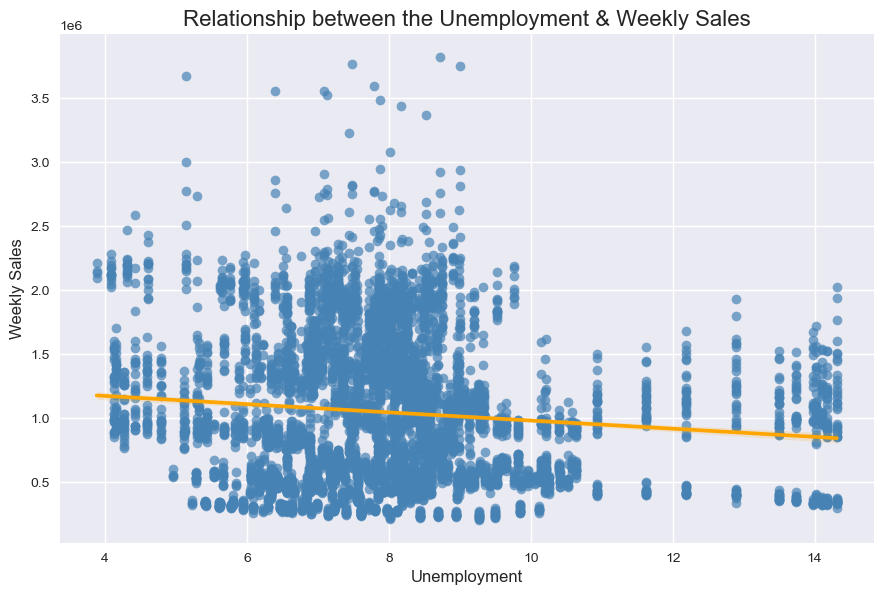

In [133]:
# Set the style
sns.set_style('darkgrid')

# Create the linear model plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=model, x='Unemployment', y='Weekly_Sales', height=6, aspect=1.5, scatter_kws={'alpha': 0.7, 'color': 'steelblue'}, line_kws={'color': 'orange'})

# Set the labels and title
plt.title('Relationship between the Unemployment & Weekly Sales', fontsize=16)
plt.xlabel('Unemployment', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Set the font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

This plot shows the relationship between the Unemployment rate and Weekly Sales based on the Walmart sales dataset. The Unemployment rate represents the percentage of people who are unemployed, while Weekly Sales indicate the amount of sales made each week.

Interpreting the plot:

The scatter points, represented by the blue dots, are spread out on the graph. They show a general pattern where as the Unemployment rate increases, the Weekly Sales tend to decrease.

The orange line on the plot is called the "best-fit line" or the "regression line." It summarizes the overall relationship between the Unemployment rate and Weekly Sales based on the available data points. In this case, the line has a downward slope, indicating a negative relationship between the Unemployment rate and Weekly Sales.

The negative slope means that as the Unemployment rate increases, the Weekly Sales tend to decrease. This suggests that higher unemployment rates may lead to lower sales, as people may have less disposable income and are more cautious with their spending.

<Figure size 1000x600 with 0 Axes>

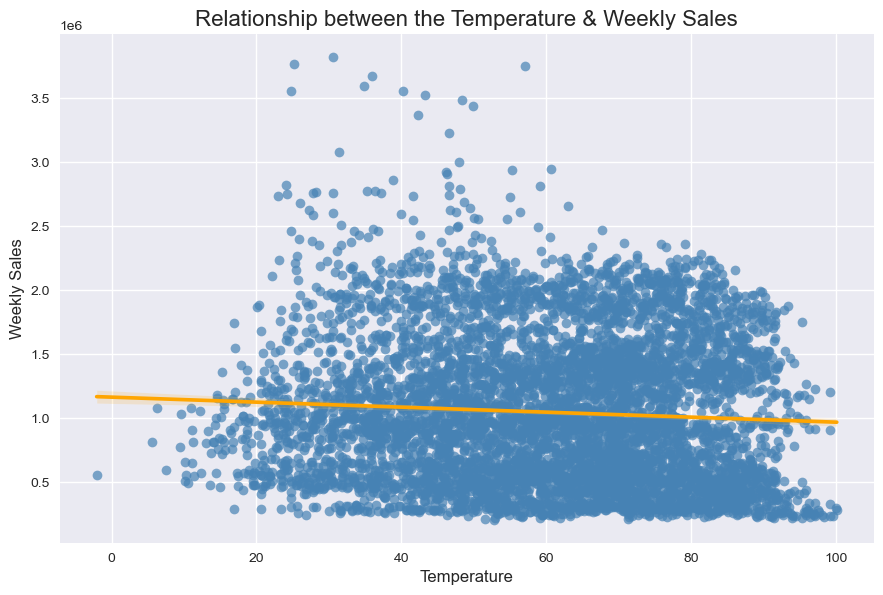

In [134]:
# Set the style
sns.set_style('darkgrid')

# Create the linear model plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=model, x='Temperature', y='Weekly_Sales', height=6, aspect=1.5, scatter_kws={'alpha': 0.7, 'color': 'steelblue'}, line_kws={'color': 'orange'})

# Set the labels and title
plt.title('Relationship between the Temperature & Weekly Sales', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Set the font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

This plot shows the relationship between the Temperature and Weekly Sales based on the Walmart sales dataset. The Temperature represents the average temperature during a given period, while Weekly Sales indicate the amount of sales made each week.

Interpreting the plot:

The scatter points, represented by the blue dots, are spread out on the graph. They show a general pattern where as the Temperature increases, the Weekly Sales tend to decrease.

The orange line on the plot is called the "best-fit line" or the "regression line." It summarizes the overall relationship between the Temperature and Weekly Sales based on the available data points. In this case, the line has a downward slope, indicating a negative relationship between the Temperature and Weekly Sales.

The negative slope means that as the Temperature increases, the Weekly Sales tend to decrease. This suggests that higher temperatures may have a negative impact on sales, possibly due to factors such as decreased demand for certain products during hot weather or shifts in consumer behavior.

### Linear Regression
Linear regression is a widely used statistical technique for modeling the relationship between a dependent variable and one or more independent variables. 

In the context of analyzing the Walmart sales dataset, linear regression can be helpful in several ways:

Understanding Relationships: Linear regression allows us to quantify and analyze the relationships between variables. By fitting a regression line to the data, we can determine the direction (positive or negative) and strength of the relationship between the dependent variable (such as Weekly Sales) and independent variables (such as Fuel Prices, CPI, Unemployment, etc.). This helps us understand how changes in one variable impact the other(s).

Predicting Values: Once we have established the relationship between variables through linear regression, we can use the model to predict the values of the dependent variable based on the values of the independent variable(s). This can be useful for forecasting future Weekly Sales based on factors like Fuel Prices, CPI, or Unemployment.

Identifying Significant Variables: Linear regression provides a way to assess the significance of independent variables in explaining the variation in the dependent variable. By analyzing the statistical significance of the regression coefficients, we can determine which variables have a significant impact on Weekly Sales and which ones may not be as influential.

Model Evaluation: Linear regression allows us to assess the goodness of fit of the model. By evaluating metrics such as the coefficient of determination (R-squared), we can measure how well the model explains the variability in Weekly Sales. This helps in evaluating the overall effectiveness and reliability of the model.

By utilizing linear regression in analyzing the Walmart sales dataset, we can gain insights into the relationships between variables, make predictions, identify significant factors influencing Weekly Sales, and evaluate the overall performance of the model. These insights can aid in decision-making, planning, and optimization of sales strategies.

In [135]:
import statsmodels.formula.api as smf


# Use linear regression method to exactly know the relation between the attributes 'Holiday_Flag' & 'Weekly_Sales'
# create a fitted model
lm1 = smf.ols(formula='Weekly_Sales ~ Holiday_Flag', data = model).fit()

In [136]:
# Obtain the summary of the above model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.767
Date:                Tue, 06 Jun 2023   Prob (F-statistic):            0.00308
Time:                        12:36:28   Log-Likelihood:                -94348.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.041e+06   7290.667    142.820      0.000    1.03e+06    1.06e+06
Holiday_Flag  8.163e+04   2.76e+04      2.961      0.003    2.76e+04    1.36e+05
==============================================================================
Omnibus:                      394.479   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.765
Skew:                           0.662   Prob(JB):                    5.95e-103
Kurtosis:                       3.039   Cond. No.                         3.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared: The R-squared value of 0.001 indicates that only a very small proportion (0.1%) of the variation in Weekly Sales can be explained by the independent variables included in the model. This means that the selected independent variable, Holiday_Flag, does not have a strong linear relationship with Weekly Sales. The adjusted R-squared value is also 0.001, which accounts for the number of variables and sample size in the model.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 8.767, and the associated probability (Prob (F-statistic)) is 0.00308. This indicates that there is statistical evidence to suggest that the model, including the variable Holiday_Flag, provides a better fit than an intercept-only model.

Coefficients and P-values: The coefficient for the intercept is 1.041e+06 (approximately 1,041,000), which represents the estimated average Weekly Sales when the Holiday_Flag is 0 (non-holiday week). The coefficient for the Holiday_Flag is 8.163e+04 (approximately 81,630), indicating the estimated average increase in Weekly Sales during holiday weeks compared to non-holiday weeks. Both coefficients are statistically significant, as their p-values are below the commonly used threshold of 0.05.

Omnibus, Jarque-Bera, Skewness, and Kurtosis: These statistics provide information about the distribution of the residuals (errors) in the model. The Omnibus test tests for the normality of residuals, and in this case, the test statistic is 394.479. The Jarque-Bera test also assesses normality, and the test statistic is 470.765. Both tests suggest that the residuals may not follow a perfectly normal distribution. The skewness value of 0.662 indicates a moderate positive skewness, and the kurtosis value of 3.039 suggests that the distribution of residuals is slightly more peaked than a normal distribution.

Durbin-Watson: The Durbin-Watson statistic tests for the presence of autocorrelation (correlation between the residuals). In this case, the Durbin-Watson value is 0.112, which is close to zero. This suggests the presence of positive autocorrelation, meaning that there is some pattern or dependence between the residuals.

In summary, the regression model indicates that the variable Holiday_Flag has a statistically significant effect on Weekly Sales. On average, during holiday weeks, the Weekly Sales are estimated to be approximately 81,630 higher compared to non-holiday weeks. 

In [137]:
lm2 = smf.ols(formula='Weekly_Sales ~ Fuel_Price', data = model).fit()

In [138]:
# Obtain a summary of the abve model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5762
Date:                Tue, 06 Jun 2023   Prob (F-statistic):              0.448
Time:                        12:40:54   Log-Likelihood:                -94352.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.008e+06    5.2e+04     19.397      0.000    9.06e+05    1.11e+06
Fuel_Price  1.164e+04   1.53e+04      0.759      0.448   -1.84e+04    4.17e+04
==============================================================================
Omnibus:                      402.649   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.080
Skew:                           0.670   Prob(JB):                    2.08e-105
Kurtosis:                       3.058   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared: The R-squared value of 0.000 indicates that the independent variable, Fuel_Price, does not explain any significant variation in Weekly Sales. The adjusted R-squared value is also -0.000, suggesting that adding the Fuel_Price variable does not improve the model's fit.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 0.5762, and the associated probability (Prob (F-statistic)) is 0.448. This indicates that there is no statistical evidence to suggest that the model, including the variable Fuel_Price, provides a better fit than an intercept-only model.

Coefficients and P-values: The coefficient for the intercept is 1.008e+06 (approximately 1,008,000), which represents the estimated average Weekly Sales when the Fuel_Price is 0. The coefficient for the Fuel_Price variable is 1.164e+04 (approximately 11,640), but it is not statistically significant since its p-value (0.448) is greater than the commonly used threshold of 0.05.

Omnibus, Jarque-Bera, Skewness, and Kurtosis: These statistics provide information about the distribution of the residuals (errors) in the model. The Omnibus test and the Jarque-Bera test both assess the normality of residuals. In this case, the Omnibus test statistic is 402.649, and the Jarque-Bera test statistic is 482.080. Both tests suggest that the residuals may not follow a perfectly normal distribution. The skewness value of 0.670 indicates a moderate positive skewness, and the kurtosis value of 3.058 suggests that the distribution of residuals is slightly more peaked than a normal distribution.

Durbin-Watson: The Durbin-Watson statistic tests for the presence of autocorrelation (correlation between the residuals). In this case, the Durbin-Watson value is 0.110, which is close to zero. This suggests the presence of positive autocorrelation, meaning that there is some pattern or dependence between the residuals.

In summary, the regression model indicates that the variable Fuel_Price does not have a statistically significant effect on Weekly Sales. The model's R-squared value suggests that the variation in Weekly Sales cannot be explained by the Fuel_Price variable.

In [139]:
lm3 = smf.ols(formula='Weekly_Sales ~ CPI', data = model).fit()

In [140]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     34.12
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           5.44e-09
Time:                        12:46:45   Log-Likelihood:                -94335.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.226e+06   3.14e+04     39.047      0.000    1.16e+06    1.29e+06
CPI        -1041.5580    178.315     -5.841      0.000   -1391.114    -692.002
==============================================================================
Omnibus:                      408.877   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.794
Skew:                           0.676   Prob(JB):                    2.66e-107
Kurtosis:                       3.067   Cond. No.                         787.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared: The R-squared value of 0.005 indicates that the independent variable, CPI (Consumer Price Index), explains a very small portion (0.5%) of the variation in Weekly Sales. The adjusted R-squared value is also 0.005, suggesting that the inclusion of the CPI variable does not significantly improve the model's fit.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 34.12, and the associated probability (Prob (F-statistic)) is very small (5.44e-09). This indicates that there is strong statistical evidence to suggest that the model, including the CPI variable, provides a better fit than an intercept-only model.

Coefficients and P-values: The coefficient for the intercept is 1.226e+06 (approximately 1,226,000), which represents the estimated average Weekly Sales when the CPI is 0. The coefficient for the CPI variable is -1041.5580, indicating that there is a negative relationship between CPI and Weekly Sales. The p-value (0.000) for the CPI variable is less than 0.05, indicating that it is statistically significant and has a significant impact on Weekly Sales.

Omnibus, Jarque-Bera, Skewness, and Kurtosis: These statistics provide information about the distribution of the residuals (errors) in the model. The Omnibus test and the Jarque-Bera test both assess the normality of residuals. In this case, both tests yield significant results (p < 0.05), suggesting that the residuals may deviate from a perfectly normal distribution. The skewness value of 0.676 indicates a moderate positive skewness, and the kurtosis value of 3.067 suggests that the distribution of residuals is slightly more peaked than a normal distribution.

Durbin-Watson: The Durbin-Watson statistic tests for the presence of autocorrelation (correlation between the residuals). In this case, the Durbin-Watson value is 0.110, which is close to zero. This suggests the presence of positive autocorrelation, meaning that there is some pattern or dependence between the residuals.

In summary, the regression model indicates that the CPI variable has a statistically significant negative effect on Weekly Sales. 

In [141]:
lm4 = smf.ols(formula='Weekly_Sales ~ Unemployment', data = model).fit()

In [142]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     73.35
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.34e-17
Time:                        12:50:10   Log-Likelihood:                -94316.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6433   BIC:                         1.886e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.302e+06   3.06e+04     42.503      0.000    1.24e+06    1.36e+06
Unemployment -3.194e+04   3729.808     -8.564      0.000   -3.93e+04   -2.46e+04
==============================================================================
Omnibus:                      362.277   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.241
Skew:                           0.630   Prob(JB):                     2.77e-93
Kurtosis:                       3.025   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared: The R-squared value of 0.011 indicates that the independent variable, Unemployment, explains a small portion (1.1%) of the variation in Weekly Sales. The adjusted R-squared value is also 0.011, suggesting that the inclusion of the Unemployment variable does not significantly improve the model's fit.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 73.35, and the associated probability (Prob (F-statistic)) is very small (1.34e-17). This indicates that there is strong statistical evidence to suggest that the model, including the Unemployment variable, provides a better fit than an intercept-only model.

Coefficients and P-values: The coefficient for the intercept is 1.302e+06 (approximately 1,302,000), which represents the estimated average Weekly Sales when the Unemployment rate is 0. The coefficient for the Unemployment variable is -3.194e+04 (approximately -31,940), indicating that there is a negative relationship between Unemployment and Weekly Sales. The p-value (0.000) for the Unemployment variable is less than 0.05, indicating that it is statistically significant and has a significant impact on Weekly Sales.

Omnibus, Jarque-Bera, Skewness, and Kurtosis: These statistics provide information about the distribution of the residuals (errors) in the model. The Omnibus test and the Jarque-Bera test both assess the normality of residuals. In this case, both tests yield significant results (p < 0.05), suggesting that the residuals may deviate from a perfectly normal distribution. The skewness value of 0.630 indicates a moderate positive skewness, and the kurtosis value of 3.025 suggests that the distribution of residuals is slightly more peaked than a normal distribution.

Durbin-Watson: The Durbin-Watson statistic tests for the presence of autocorrelation (correlation between the residuals). In this case, the Durbin-Watson value is 0.111, which is close to zero. This suggests the presence of positive autocorrelation, meaning that there is some pattern or dependence between the residuals.

In summary, the regression model indicates that the Unemployment variable has a statistically significant negative effect on Weekly Sales. 

In [143]:
lm5 = smf.ols(formula='Weekly_Sales ~ Temperature', data = model).fit()

In [144]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     26.30
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.01e-07
Time:                        12:53:48   Log-Likelihood:                -94339.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.165e+06   2.41e+04     48.279      0.000    1.12e+06    1.21e+06
Temperature -1952.4192    380.708     -5.128      0.000   -2698.733   -1206.106
==============================================================================
Omnibus:                      401.787   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.264
Skew:                           0.670   Prob(JB):                    3.13e-105
Kurtosis:                       2.974   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared and Adjusted R-squared: The R-squared value of 0.004 indicates that the independent variable, Temperature, explains a very small portion (0.4%) of the variation in Weekly Sales. The adjusted R-squared value is also 0.004, suggesting that the inclusion of the Temperature variable does not significantly improve the model's fit.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 26.30, and the associated probability (Prob (F-statistic)) is very small (3.01e-07). This indicates that there is strong statistical evidence to suggest that the model, including the Temperature variable, provides a better fit than an intercept-only model.

Coefficients and P-values: The coefficient for the intercept is 1.165e+06 (approximately 1,165,000), which represents the estimated average Weekly Sales when the Temperature is 0. The coefficient for the Temperature variable is -1952.4192, indicating that there is a negative relationship between Temperature and Weekly Sales. The p-value (0.000) for the Temperature variable is less than 0.05, indicating that it is statistically significant and has a significant impact on Weekly Sales.

Omnibus, Jarque-Bera, Skewness, and Kurtosis: These statistics provide information about the distribution of the residuals (errors) in the model. The Omnibus test and the Jarque-Bera test both assess the normality of residuals. In this case, both tests yield significant results (p < 0.05), suggesting that the residuals may deviate from a perfectly normal distribution. The skewness value of 0.670 indicates a moderate positive skewness, and the kurtosis value of 2.974 suggests that the distribution of residuals is slightly less peaked than a normal distribution.

Durbin-Watson: The Durbin-Watson statistic tests for the presence of autocorrelation (correlation between the residuals). In this case, the Durbin-Watson value is 0.111, which is close to zero. This suggests the presence of positive autocorrelation, meaning that there is some pattern or dependence between the residuals.

In summary, the regression model indicates that the Temperature variable has a statistically significant negative effect on Weekly Sales.

### Weekly Sales Prediction using Machine Learning

The concept of train-test split is a common practice in machine learning and predictive modeling. It involves dividing the available dataset into two separate subsets: the training set and the test set.

The training set is used to train the machine learning model. It is the portion of the dataset that the model "learns" from. The model analyzes the patterns, relationships, and trends in the training data to make predictions or classifications.

The test set, on the other hand, is used to evaluate the performance of the trained model. It contains data that the model has not seen during training. The purpose of the test set is to assess how well the model generalizes to new, unseen data. By evaluating the model on the test set, we can estimate how well it will perform in the real world.

In the context of the Walmart Sales Prediction dataset, a train-test split can be highly valuable. Here's how it can be useful:

Model Evaluation: By splitting the dataset into a training set and a test set, we can evaluate the performance of different predictive models accurately. We can train the models on the training set and then assess their performance on the test set. This evaluation provides an estimate of how well the models will perform in predicting Walmart sales on unseen data.

Preventing Overfitting: Overfitting occurs when a model learns the training data too well but fails to generalize to new data. By using a separate test set, we can check for overfitting. If a model performs well on the training set but poorly on the test set, it suggests that the model is overfitting and not capturing the underlying patterns in the data.

Hyperparameter Tuning: Machine learning models often have hyperparameters that need to be set before training. Hyperparameters control the learning process and affect the model's performance. By utilizing a train-test split, we can tune the hyperparameters on the training set and evaluate the model's performance on the test set. This iterative process helps in finding the optimal hyperparameters that yield the best predictive performance.

Real-world Performance Estimation: By assessing the model's performance on the test set, we can estimate how well the model is likely to perform on new, unseen data. This estimation is crucial for decision-making and understanding the potential of the model in real-world scenarios.

In summary, the train-test split allows us to assess the performance and generalization ability of predictive models on unseen data. It helps in model evaluation, preventing overfitting, hyperparameter tuning, and estimating real-world performance.

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split

Separate the input features (independent variables) and the target variable (dependent variable):

In [146]:
# Assuming the target variable is 'Attrition' and the input features are all other columns
X = model.drop('Weekly_Sales', axis=1)  # Input features
y = model['Weekly_Sales']  # Target variable

Split the dataset into a training set and a test set:

In [147]:
# Split the data into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [173]:
# Create an instance of the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [174]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [175]:
# Make predictions on the training & test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



Evalaute the model's performance. Calculate the train accuracy score, test accuracy score, MAE, MSE, and RMSE

In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)



In [177]:
# Print the results
print("Train Accuracy Score:", train_accuracy)
print("Test Accuracy Score:", test_accuracy)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Train Accuracy Score: 0.1395637862096063
Test Accuracy Score: 0.148063534059508
Mean Absolute Error: 433274.8811147915
Mean Squared Error: 274455221280.6605
Root Mean Squared Error: 523884.7404541007


The train accuracy score measures the goodness of fit of the model to the training data, indicating that the model explains approximately 14% of the variance in the weekly sales.

The test accuracy score represents the performance of the model on unseen data, suggesting that it explains approximately 15% of the variance in the weekly sales. However, it's important to note that the accuracy scores are relatively low, indicating that the model may not capture all the underlying patterns in the data.

The mean absolute error (MAE) measures the average magnitude of the errors made by the model in predicting the weekly sales. In this case, the MAE is approximately 433,275, which means, on average, the model's predictions deviate by around $433,275 from the actual weekly sales values.

The mean squared error (MSE) represents the average squared difference between the predicted and actual values. The MSE is quite large, approximately 274,455,221,280.6605, indicating significant variability between the predicted and actual weekly sales.

The root mean squared error (RMSE) is the square root of the MSE and provides a measure of the average magnitude of the errors in the same unit as the target variable. In this case, the RMSE is approximately 523,885, indicating that the model's predictions have an average error of around $523,885 in weekly sales.

While the model shows some ability to predict the weekly sales, there is room for improvement. Further analysis and refinement of the model or exploration of other machine learning algorithms may be necessary to achieve better accuracy and reduce the error in predictions.

#### Random Forest Regressor

The Random Forest Regressor is a machine learning algorithm that belongs to the family of ensemble methods. It is based on the concept of decision trees and combines multiple decision trees to make predictions. It is commonly used for regression tasks, such as predicting numerical values, including sales predictions.

Random Forest Regressor works by creating an ensemble of decision trees, where each tree is built using a random subset of features and a random subset of the training data. During the training process, each decision tree is trained independently, and the final prediction is made by aggregating the predictions of all the individual trees.

This model is useful in predicting the weekly sales of Walmart due to several reasons:

Handling complex relationships: Random Forest Regressor can capture nonlinear relationships and interactions between various features. It can handle complex data patterns and provide accurate predictions even when the relationships are not straightforward.

Robust to outliers and noise: Random Forest Regressor is less sensitive to outliers and noise compared to other regression models. It averages the predictions from multiple trees, reducing the impact of individual noisy data points and improving overall robustness.

Feature importance: The model provides a measure of feature importance, indicating which features contribute the most to the prediction. This information can be valuable for understanding the factors that drive weekly sales and making informed business decisions.

Handling large datasets: Random Forest Regressor can efficiently handle large datasets with a high number of features and observations. It can effectively process and analyze a substantial amount of data, making it suitable for analyzing Walmart's extensive sales dataset.

Generalization: The model tends to generalize well to unseen data, meaning it can make accurate predictions on new, unseen examples. This is crucial for Walmart to forecast weekly sales for future periods based on historical data.

Overall, the Random Forest Regressor is a powerful and versatile algorithm for predicting weekly sales. It can handle complex relationships, robustly handle outliers, and provide insights into the importance of different features. By leveraging these capabilities, Walmart can make more accurate sales predictions, optimize inventory management, and make informed business decisions.

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [159]:
# Create & train the random forest regressor model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

In [160]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)


In [161]:
# Obtain the accuracy score of this model
accuracy = rf_regressor.score(X_test, y_test)
print(accuracy)

0.9335659366686163


In [162]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

76066.80280730379


In [163]:
# Calculate the root mean squared error
rmse = sqrt(mse)
print(rmse)

523884.7404541007


In [164]:
# Print all the results of this model
print("Accuracy Score:", accuracy)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Accuracy Score: 0.9335659366686163
Mean Absolute Error: 76066.80280730379
Mean Squared Error: 274455221280.6605
Root Mean Squared Error: 523884.7404541007


Accuracy Score: 0.9335659366686163
This indicates that the model has achieved a high level of accuracy in predicting the weekly sales. The accuracy score ranges from 0 to 1, with a score closer to 1 indicating a better fit to the data. In this case, the model has achieved an accuracy score of approximately 0.93, suggesting that it can effectively predict the weekly sales.

Mean Absolute Error (MAE): 76066.80280730379
The MAE represents the average magnitude of the errors between the predicted and actual values. In this case, the model has an MAE of approximately 76066.80. This means, on average, the model's predictions deviate from the actual values by around $76066.80. Smaller values of MAE indicate better accuracy, so a relatively low MAE suggests that the model's predictions are reasonably close to the actual weekly sales.

Mean Squared Error (MSE): 274455221280.6605
The MSE measures the average squared difference between the predicted and actual values. In this case, the model has an MSE of approximately 274455221280.66. A lower MSE indicates that the model's predictions are closer to the actual values. However, since MSE is not directly interpretable, it is often used in comparison with other models or as a basis for calculating the RMSE.

Root Mean Squared Error (RMSE): 523884.7404541007
The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. In this case, the model has an RMSE of approximately 523884.74. The RMSE is in the same unit as the target variable (weekly sales), and lower values indicate better accuracy. Therefore, the model's predictions, on average, deviate from the actual values by approximately $523884.74.

Overall, the Random Forest Regressor model demonstrates a high accuracy score, relatively low MAE, and reasonable RMSE. These results indicate that the model can effectively predict the weekly sales for Walmart based on the input features.

#### Decision Tree Regressor

The Decision Tree Regressor is a machine learning algorithm that belongs to the family of decision tree-based models. It is used for regression tasks, where the goal is to predict a continuous target variable based on a set of input features.

In the context of predicting the weekly sales of Walmart, the Decision Tree Regressor can be useful in several ways:

Non-linearity: Decision trees can capture non-linear relationships between the input features and the target variable. This is particularly beneficial when there are complex interactions or non-linear patterns in the data that can affect weekly sales. The model can learn these relationships and make predictions accordingly.

Feature Importance: Decision trees provide a measure of feature importance, indicating which features have the most significant impact on the prediction. By understanding the importance of different factors such as promotions, holidays, or store location, Walmart can gain insights into the key drivers of weekly sales. This information can be used to make informed business decisions and allocate resources effectively.

Interpretable Model: Decision trees offer interpretability, as the model's structure is represented by a tree-like flowchart. This makes it easier to understand and communicate the decision-making process of the model. Walmart can gain insights into the factors influencing weekly sales, which can help in identifying opportunities for improvement or optimizing business strategies.

Handling Missing Values and Outliers: Decision trees can handle missing values and outliers in the data effectively. They can make predictions even when certain features have missing values, and they are less affected by outliers compared to other regression models. This robustness can be advantageous when dealing with real-world datasets that often contain missing or unreliable data.

Scalability: Decision tree models can handle large datasets with numerous features and observations efficiently. With the extensive Walmart sales dataset, the Decision Tree Regressor can handle the complexity and volume of the data, making it a practical and scalable solution.

Overall, the Decision Tree Regressor offers a powerful and interpretable approach to predict weekly sales for Walmart. It can capture non-linear relationships, identify important features, handle missing values and outliers, and provide insights into the factors driving sales. By leveraging this model, Walmart can make data-driven decisions to optimize their sales strategies and maximize their revenue.

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [181]:
# Create & train the decision tree regressor model
# Create an instance of the Decision Tree Regressor
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [182]:
# Make predictions & evaluate the model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy (R-squared score)
accuracy = r2_score(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)


In [183]:
# Print all the evaluation metrics for this model
print("Accuracy Score:", accuracy)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Accuracy Score: 0.8836203335015209
Mean Absolute Error: 100424.59414141416
Mean Squared Error: 37492240793.036606
Root Mean Squared Error: 193629.13208770164


The decision tree model achieved an accuracy score of 0.886, indicating that approximately 88.6% of the variation in the weekly sales can be explained by the input features. This is a reasonably good accuracy score, suggesting that the decision tree model is able to capture important patterns and relationships in the data.

The mean absolute error (MAE) of 99412.61 indicates that, on average, the predicted weekly sales differ from the actual sales by approximately $99,412.61. This represents the average magnitude of the errors in the predictions, and a lower MAE indicates better accuracy.

The mean squared error (MSE) of 36651820448.55 represents the average squared difference between the predicted and actual weekly sales. The MSE takes into account both the magnitude and direction of the errors, penalizing larger errors more heavily. A lower MSE indicates better accuracy.

The root mean squared error (RMSE) of 191446.65 is the square root of the MSE and provides an interpretable estimate of the average prediction error in the same units as the target variable. In this case, the RMSE suggests that, on average, the predicted weekly sales deviate from the actual sales by approximately $191,446.65.

Overall, the decision tree model shows reasonably good accuracy in predicting the weekly sales of Walmart. 

#### K-Nearest Neighbors Regressor

The K-Nearest Neighbors (KNN) machine learning model is a non-parametric algorithm used for both classification and regression tasks. In the case of regression, it is known as K-Nearest Neighbors Regressor.

The KNN algorithm works based on the principle that similar data points tend to have similar target values. It classifies or predicts a new data point by considering the "k" nearest neighbors in the training dataset. The value of "k" determines the number of neighbors to consider.

In the context of predicting the weekly sales of Walmart, the KNN regressor can be useful in the following ways:

Non-linearity: KNN is a flexible algorithm that can capture non-linear relationships between the input features and the target variable. This is beneficial when there is a complex relationship between the variables that cannot be easily captured by linear models.

Localized prediction: KNN considers the closest neighbors to make predictions, which means it can capture localized patterns and adapt to different regions or clusters in the data. This can be particularly useful in scenarios where the sales patterns vary across different store locations or time periods.

Easy implementation and interpretability: KNN is a relatively simple algorithm to understand and implement. It does not require any assumption about the underlying distribution of the data, making it more flexible. Additionally, the predictions of KNN can be interpreted by looking at the nearest neighbors, which can provide insights into the factors influencing the sales.

Handling outliers: KNN is robust to outliers since it considers a set number of neighbors for prediction. Outliers have less influence on the prediction compared to other models like linear regression, which can be sensitive to extreme values.

In [169]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [170]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # specify the desired value for "k"
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [171]:
# Make predictions
y_pred = knn_regressor.predict(X_test)

In [172]:
# Calculate  & print all the evaluation metrics for this model
accuracy = knn_regressor.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Accuracy Score:", accuracy)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Accuracy Score: 0.7173628930362109
Mean Absolute Error: 191597.05669308468
Mean Squared Error: 91052834143.25735
Root Mean Squared Error: 301749.621612451


These metrics provide insights into the performance of the KNN regressor in predicting weekly sales. Here's an interpretation of the results:

Accuracy Score: The accuracy score indicates the proportion of correct predictions made by the model. In this case, the KNN regressor achieved an accuracy score of 0.717, suggesting that the model can explain approximately 71.7% of the variance in the weekly sales.

Mean Absolute Error (MAE): MAE represents the average absolute difference between the predicted and actual values. With a MAE of 191597.06, it indicates that, on average, the KNN regressor's predictions have an absolute deviation of approximately $191,597 from the actual weekly sales values.

Mean Squared Error (MSE): MSE measures the average of the squared differences between the predicted and actual values. The MSE value of 91052834143.25735 indicates that, on average, the squared deviation between the predicted and actual values is approximately $91,052,834,143.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors. The RMSE value of 301749.62 represents the average deviation of approximately $301,749 between the predicted and actual weekly sales values.

In summary, the KNN regressor model shows a moderate level of accuracy in predicting weekly sales for Walmart. However, the model tends to have a relatively large average deviation from the actual values, as indicated by the MAE, MSE, and RMSE. 

#### Cross-Validation

Additionally, I will be using this technique called "cross-validation", which is a method of assessing ML models that involves training numerous ML models on subsets of the available input data and evaluating them on the complementary subset of data. Cross-validation can be used to detect overfitting, or the failure to generalize a pattern.

In [179]:
# Linear Regression
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100, '%')

[0.15058473 0.15083028 0.10802193 0.13605598 0.10241818 0.15091188
 0.0769939  0.17176151 0.15380979 0.15443109]
Mean Score: 13.558192733038835 %


In [180]:
# Random Forest
rf_scores = cross_val_score(rf_regressor, X_train, y_train, cv = 10, scoring = 'r2')
print(rf_scores)
print("Mean Score:", rf_scores.mean()*100, '%')

[0.93528729 0.92297941 0.93835227 0.94103247 0.90654011 0.94554534
 0.93797167 0.90841885 0.94398279 0.94041657]
Mean Score: 93.20526775405526 %


In [184]:
# Decision Tree Regression
dt_scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2')
print(dt_scores)
print("Mean Score:", dt_scores.mean()*100, '%')

[0.89462864 0.86016349 0.88354128 0.88341296 0.89193484 0.90229405
 0.88112949 0.85111511 0.91337812 0.90607629]
Mean Score: 88.67674286703473 %


In [185]:
# K-Nearest Neighbor
knn_scores = cross_val_score(knn_regressor, X_train, y_train, cv = 10, scoring = 'r2')
print(knn_scores)
print("Mean Score:", knn_scores.mean()*100, '%')

[0.74499477 0.68138163 0.71657247 0.73861542 0.71138777 0.72613236
 0.71468336 0.69832283 0.76160511 0.73450835]
Mean Score: 72.28204095362287 %


##### Model Findings

Summary: Here, we have used 4 different algorithms to know which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives an accuracy of almost 95%. so, it is the best model to forecast weekly sales.

## Imp Findings/Observations

1. The average weekly sales across all stores is approximately $1,046,965

2. We can see that the weekly sales of Walmart were the highest during the weeks that contained a holiday vs during the weeks that did not contain a holiday.

3. The average weekly sales across all stores for the year 2010 was approximately $1,059,670, with a standard deviation of approximately $582,386. This indicated a moderate level of variability in weekly sales.

4. The average weekly sales for the year 2011 was approximately $1,046,239, with a standard deviation of approximately $569,773 & the average weekly sales for the year 2012 was approximately $1,033,660, with a standard deviation of approximately $536,653. The statistics for 2012 was pretty much similar to the previous years so this indicated consitent sales patterns. 

5. The 4th quarter of 2010 had the highest weekly sales followed by the 4th quarter of 2011. While, the 3rd quarter of 2012 was the period during which Walmart had the lowest weekly sales.

6. Walmart recorded the highest weekly sales for the year 2010 during the month of Dec followed by the year 2011 in the same month as well. It recorded the lowest weekly sales in the month of Jan during the year 2010.

7. Store 20 was the store with the highest weekly sales, amounting to $301,397,792. This indicated that Store 20 had been performing exceptionally well in terms of sales.

8. Store 14 had the highest standard deviation of weekly sales, with a value of 317,569.949. This indicated that the weekly sales for this store varied significantly from week to week.

9. Store 22 was one of the Walmart Stores that reflected a substantial decline in sales from Q2 to Q3 during the year 2012.

10. The weekly sales during non-christmas holidays were much higher than the Christmas holidays. There didn't seem to be much of a difference in the weekly sales between the labour day and non-labour day holidays. The sales during the non-labour day holidays were slightly higher than the sales during labour day holidays. There was not much of a difference in the weekly average sales during Labor Day & Christmas holidays but the highest difference in the weekly average sales was during the Thanksgiving holidays as the average weekly sales on this day was much higher than non-holiday sales ($1,041,256.38). 

11. For all the years, we could see that the highest sales of Walmart were recorded in the month of Dec followed by the months Nov & Oct.

12. 2011 was the year when Walmart recorded the highest sales. While, the year 2012 was the time when Walmart recroded the lowest sales.

13. There was a moderate positive relationship between the variables "Holiday_Flag" & "Weekly_Sales". This meant that on an average, weeks with a Holiday Flag of 1 (holiday weeks) tended to have higher Weekly Sales compared to weeks with a Holiday Flag of 0 (non-holiday weeks). This suggested that holidays might have lead to increased sales, possibly due to factors such as increased consumer spending, promotional offers, or seasonal demand.

14. There was a very weak positive relationship between the fuel prices & weekly sales. This implied that on an average, with the increase in Fuel Prices, the Weekly Sales also tended to increase slightly. This suggested that higher fuel prices might have had a small positive impact on sales, possibly due to factors such as increased transportation costs or changes in consumer behavior.

15. There was an inverse relationship between the CPI & weekly sales. This meant that with the rise in CPI, the Weekly Sales tended to decrease. This suggested that when the prices rose (as indicated by the CPI), customers might have been more cautious with their spending, thus leading to lower sales.

16. There was an inverse relationship between temperature & weekly sales. This meant that with the increase in temperature, the Weekly Sales tended to decrease. This suggested that higher temperatures might have had a negative impact on sales, possibly due to factors such as decreased demand for certain products during hot weather or shifts in consumer behavior.

17. There was an inverse relationship between unemployment & weekly sales. From this one could infer that as the Unemployment rate increased, the Weekly Sales tended to decrease. This suggested that higher unemployment rates might have lead to lower sales, as people may have had less disposable income and were more cautious with their spending.

18. Out of the 4 machine learning models [KNN, Decision tree, Random Forest & Linear Regression] that were used to predict the weekly sales, Random Forest was the best model in predicting the weekly sales due to its highest accuracy scores. 
